In [62]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [63]:
# Path to google drive folder
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002. Laporan-eksperimen

# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [65]:
# !ls

In [66]:
# Load the dataset
file_path = 'dataset/agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for review
data.head(),data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2194 non-null   float64
 16  NH4          2170 non-null   float64
 17  NO3          2216 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

(      Date  Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  2012   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  2012   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  2012   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  2012   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  2012   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O  N_rate  ...   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm  \
 0  Annual  3.896742     170  ...  0.00  -2.0     276     241  0.666508   
 1  Annual  2.190218     170  ...  0.00  -2.4     277     242  0.640608   
 2  Annual  3.542594     170  ...  8.64   0.3     285     250  0.728085   
 3  Annual  3.342870     170  ...  8.13  -3.8     286     251  0.686872   
 4  Annual  2.947778     170  ...  8.39  17.6     312     277  0.716221   
 
          NH4        NO3  Clay   Sand       SOM  
 0  11.046340  22.940812  62.5  637.5  1.17407

## Detect Nilai NaN

In [67]:

missing_values_count = data.isna().sum()
missing_values_count

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

## Impute NaN or missing value with Mean

In [68]:
# Impute missing values with the mean of the respective columns
data['WFPS25cm'].fillna(data['WFPS25cm'].mean(), inplace=True)
data['NH4'].fillna(data['NH4'].mean(), inplace=True)
data['NO3'].fillna(data['NO3'].mean(), inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = data.isna().sum()
missing_values_after_imputation

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13008\190507584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['WFPS25cm'].fillna(data['WFPS25cm'].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13008\190507584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Date           0
Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [69]:
# Save the cleaned dataset to a new CSV file
output_file_path = 'hasil/BeforeRemoveOutliers/001.input_NaN_mean_agriculture_dataset.csv'
data.to_csv(output_file_path, index=False)

output_file_path

'hasil/BeforeRemoveOutliers/001.input_NaN_mean_agriculture_dataset.csv'

## Detect NaN Value

In [70]:
missing_values_count = data.isna().sum()
missing_values_count

Date           0
Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2246 non-null   float64
 16  NH4          2246 non-null   float64
 17  NO3          2246 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

## StandardScaler

In [72]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the scaled dataset to a new CSV file
scaled_output_file_path = 'hasil/BeforeRemoveOutliers/002.standard_scaler_agriculture_dataset.csv'
data.to_csv(scaled_output_file_path, index=False)

# Display the head of the scaled dataset
scaled_data_head = data.head()
scaled_data_head, scaled_output_file_path

(      Date      Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O    N_rate  ...       PP7      AirT    DAF_TD    DAF_SD  \
 0  Annual -0.125408  0.481233  ... -0.811416 -1.518617  0.556855  0.294676   
 1  Annual -0.185324  0.481233  ... -0.811416 -1.560776  0.563758  0.301675   
 2  Annual -0.137842  0.481233  ... -0.447138 -1.276207  0.618974  0.357667   
 3  Annual -0.144855  0.481233  ... -0.468640 -1.708330  0.625877  0.364667   
 4  Annual -0.158726  0.481233  ... -0.457678  0.547142  0.805331  0.546643   
 
    WFPS25cm       NH4       NO3      Clay      

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns


## Detect Outliers With Isolation Forest (IF)

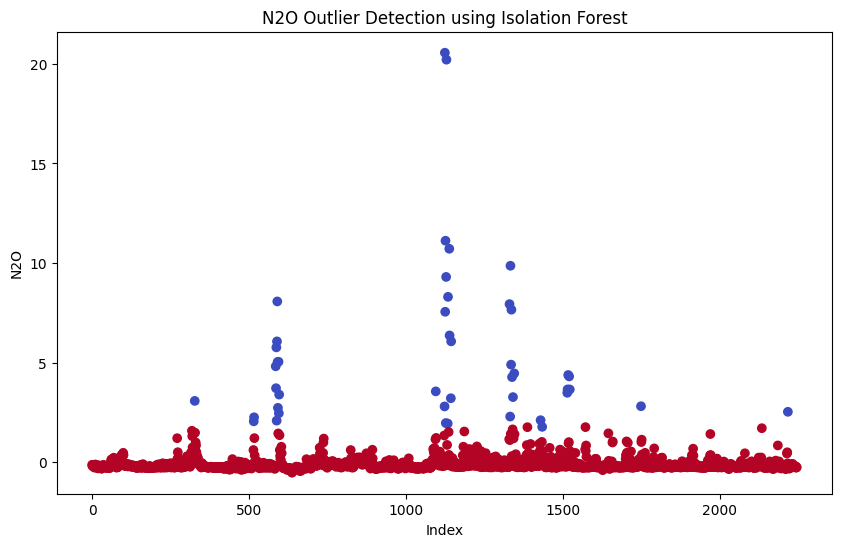

In [74]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.02)
iso_pred = iso.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Outlier'] = iso_pred

# Visualize the outliers

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['N2O'], c=data['IF_Outlier'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('N2O')
plt.title('N2O Outlier Detection using Isolation Forest')
plt.savefig('Visual/BeforeRemoveOutliers/001_N2O_IF_Outlier_Detection.png')
plt.show()

# Filter data to remove outliers
# filtered_data = data[data['IF_Outlier'] == 1]


# Display filtered data
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered Data without Outliers", dataframe=filtered_data)

In [75]:
data.to_csv('hasil/BeforeRemoveOutliers/003_0.after_outlier_detected_IF.csv', index=False)

data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,IF_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-1.518617,0.556855,0.294676,0.797637,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-1.560776,0.563758,0.301675,0.645128,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-1.276207,0.618974,0.357667,1.160223,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-1.708330,0.625877,0.364667,0.917547,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,0.547142,0.805331,0.546643,1.090364,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.168496,-0.195475,-0.223257,-0.829336,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.713393,0.011589,-0.013285,-1.260143,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.713393,0.011589,-0.013285,-1.116541,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.713393,0.011589,-0.013285,-0.972939,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1


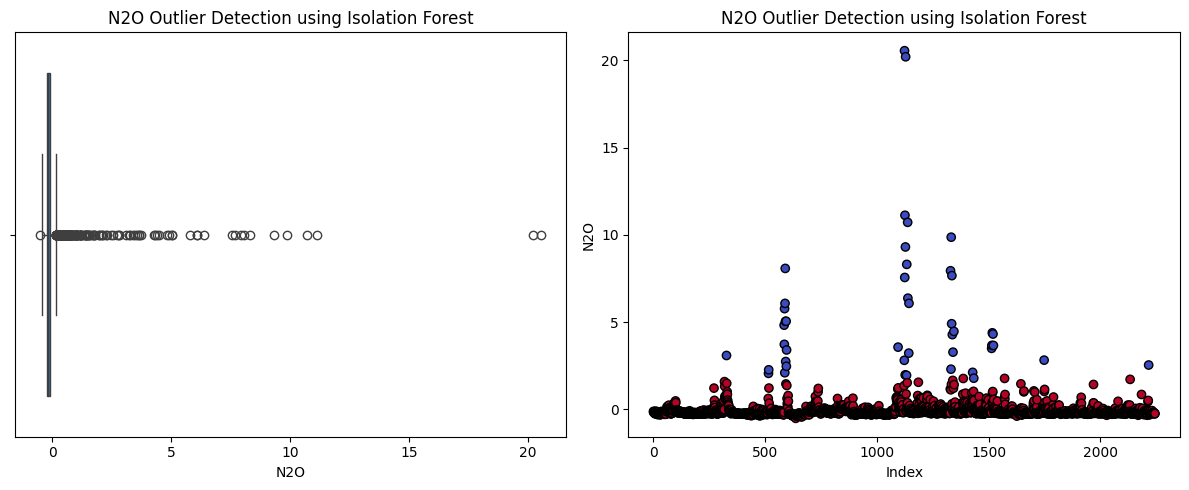

Jumlah Outliers hasil deteksi IF:45


In [76]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=data['N2O'], ax=axs[0])
axs[0].set_title('N2O Outlier Detection using Isolation Forest')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(data.index, data['N2O'], c=data['IF_Outlier'], cmap='coolwarm', edgecolor='k')
axs[1].set_title('N2O Outlier Detection using Isolation Forest')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
plt.savefig('Visual/BeforeRemoveOutliers/001_1_N2O_IF_Outlier_Detection.png')
plt.show()



# Calculate the number of outliers detected by Isolation Forest in the dataset
if_outliers_count = (data['IF_Outlier'] == -1).sum()
print('Jumlah Outliers hasil deteksi IF:'+str(int(if_outliers_count)))


## Visualisasi Non-Outliers Filtered

In [77]:
# Filter data to remove outliers
filtered_data = data[data['IF_Outlier'] == 1] #filter ini untuk data yang tanpa outliers
outliers_data = data[data['IF_Outlier'] == -1] #filter ini untuk data yang tanpa outliers

# Save the filtered data to a new CSV file
filtered_data.to_csv('hasil/BeforeRemoveOutliers/003_1.after_outlier_detection_filtered_nonoutlier_IF.csv', index=False)
outliers_data.to_csv('hasil/BeforeRemoveOutliers/003_2.after_outlier_detection_outliersonly_IF.csv', index=False)
# print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")
# plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/002_1_N2O_IF_OutlierFilter_Detection.png')
# Calculate the number of outliers detected by Isolation Forest in the dataset
if_nonoutliers_count = (data['IF_Outlier'] == 1).sum()
print('Jumlah Non-Outliers hasil deteksi IF:'+str(int(if_nonoutliers_count)))

# Display filtered data
print(filtered_data)

Jumlah Non-Outliers hasil deteksi IF:2201
            Date      Year Experiment   DataUse Replication     Month  \
0         2/9/12  0.020682   BCSE_KBS  Building          R1  February   
1        2/10/12  0.020682   BCSE_KBS  Building          R1  February   
2        2/18/12  0.020682   BCSE_KBS  Building          R1  February   
3        2/19/12  0.020682   BCSE_KBS  Building          R1  February   
4        3/16/12  0.020682   BCSE_KBS  Building          R1     March   
...          ...       ...        ...       ...         ...       ...   
2241  10/16/2013  0.297184    MCSE-T2   Testing          R4   October   
2242  11/15/2013  0.297184    MCSE-T2   Testing          R1  November   
2243  11/15/2013  0.297184    MCSE-T2   Testing          R2  November   
2244  11/15/2013  0.297184    MCSE-T2   Testing          R3  November   
2245  11/15/2013  0.297184    MCSE-T2   Testing          R4  November   

     Vegetation VegType       N2O    N_rate  ...      AirT    DAF_TD  \
0        

### Non-Outliers Filtered

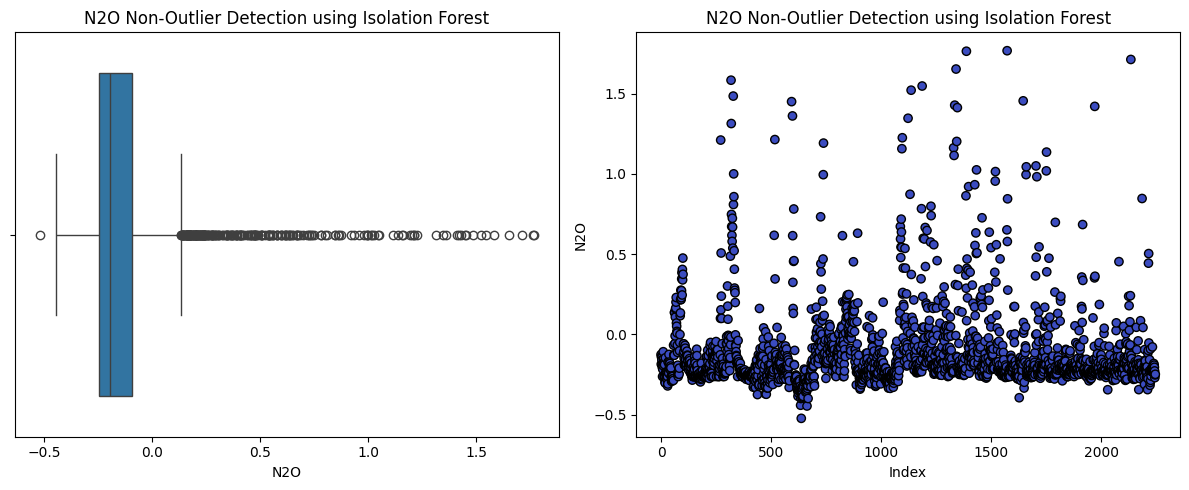

In [78]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=filtered_data['N2O'], ax=axs[0])
axs[0].set_title('N2O Non-Outlier Detection using Isolation Forest')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(filtered_data.index, filtered_data['N2O'], c=filtered_data['IF_Outlier'], cmap='coolwarm', edgecolor='k')
axs[1].set_title('N2O Non-Outlier Detection using Isolation Forest')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
plt.savefig('Visual/BeforeRemoveOutliers/002_0_N2O_IF_NonOutlierFilter_Detection.png')
plt.show()

### Outliers

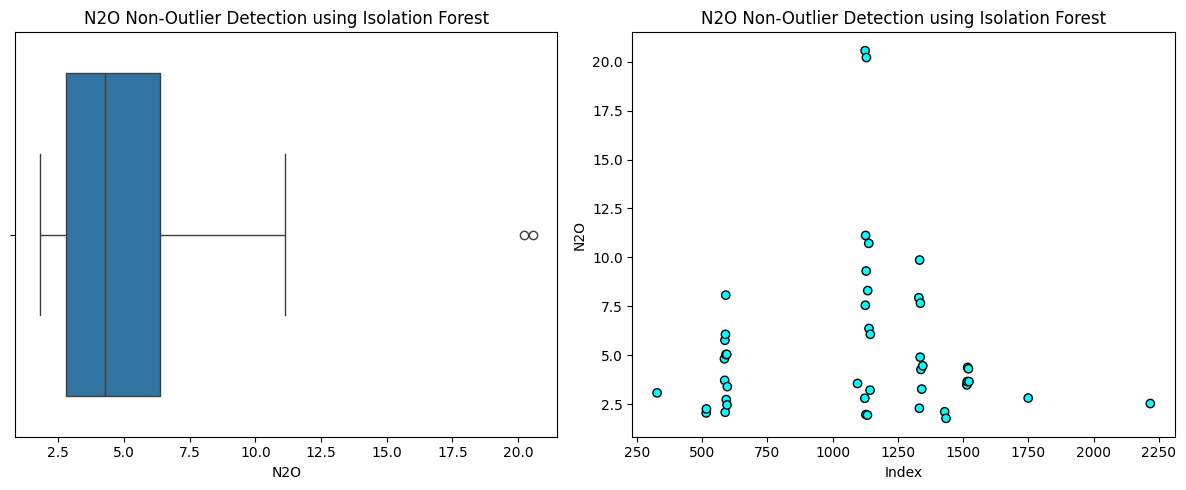

In [79]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=outliers_data['N2O'], ax=axs[0])
axs[0].set_title('N2O Non-Outlier Detection using Isolation Forest')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(outliers_data.index, outliers_data['N2O'], c=outliers_data['IF_Outlier'], cmap='cool', edgecolor='k')
axs[1].set_title('N2O Non-Outlier Detection using Isolation Forest')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
plt.savefig('Visual/BeforeRemoveOutliers/002_1_N2O_IF_OutlierFilter_Detection.png')
plt.show()

## Detect Outlier With IQR

In [80]:
# Extract the N2O column
N2O_data = data['N2O']

# Detect outliers using IQR method
Q1 = N2O_data.quantile(0.25)
Q3 = N2O_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound_IQR = Q1 - 1.5 * IQR
upper_bound_IQR = Q3 + 1.5 * IQR
outliers_IQR = N2O_data[(N2O_data < lower_bound_IQR) | (N2O_data > upper_bound_IQR)]

# Create a summary table
summary_table = pd.DataFrame({
    'Method': ['IQR'],
    'Lower Bound': [lower_bound_IQR],
    'Upper Bound': [upper_bound_IQR],
    'Outlier Count': [outliers_IQR.count()]
})

# Save the summary table to a CSV file
summary_file_path = 'hasil/004_0.after_outlier_N2O_outlier_summary_IQR.csv'
summary_table.to_csv(summary_file_path, index=False)

In [81]:
# Function to calculate IQR bounds
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [82]:
# Detect outliers and create summary table
summary_table = []
numerical_columns = data.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    lower_bound_IQR, upper_bound_IQR = iqr_bounds(data[col])

    outliers_IQR = data[(data[col] < lower_bound_IQR) | (data[col] > upper_bound_IQR)][col]

    summary_table.append({
        'Column': col,
        'Method': 'IQR',
        'Lower Bound': lower_bound_IQR,
        'Upper Bound': upper_bound_IQR,
        'Outlier Count': outliers_IQR.count()
    })

summary_df = pd.DataFrame(summary_table)

In [83]:
# Save the summary table to a CSV file
summary_file_path = 'hasil/004_1.after_outlier_IQR_numerical_columns_outlier_summary.csv'
summary_df.to_csv(summary_file_path, index=False)
summary_df

,Column,Method,Lower Bound,Upper Bound,Outlier Count
0,Year,IQR,-1.500078,1.817944,259
1,N2O,IQR,-0.491163,0.166560,251
2,N_rate,IQR,-1.077984,1.416763,283
3,PP2,IQR,-1.413238,0.972001,244
4,PP7,IQR,-2.143730,1.809364,114
5,AirT,IQR,-2.915639,3.041335,4
6,DAF_TD,IQR,-3.280719,3.221071,17
7,DAF_SD,IQR,-3.439341,3.419771,0
8,WFPS25cm,IQR,-3.366875,3.399895,0
9,NH4,IQR,-1.190726,0.747944,215


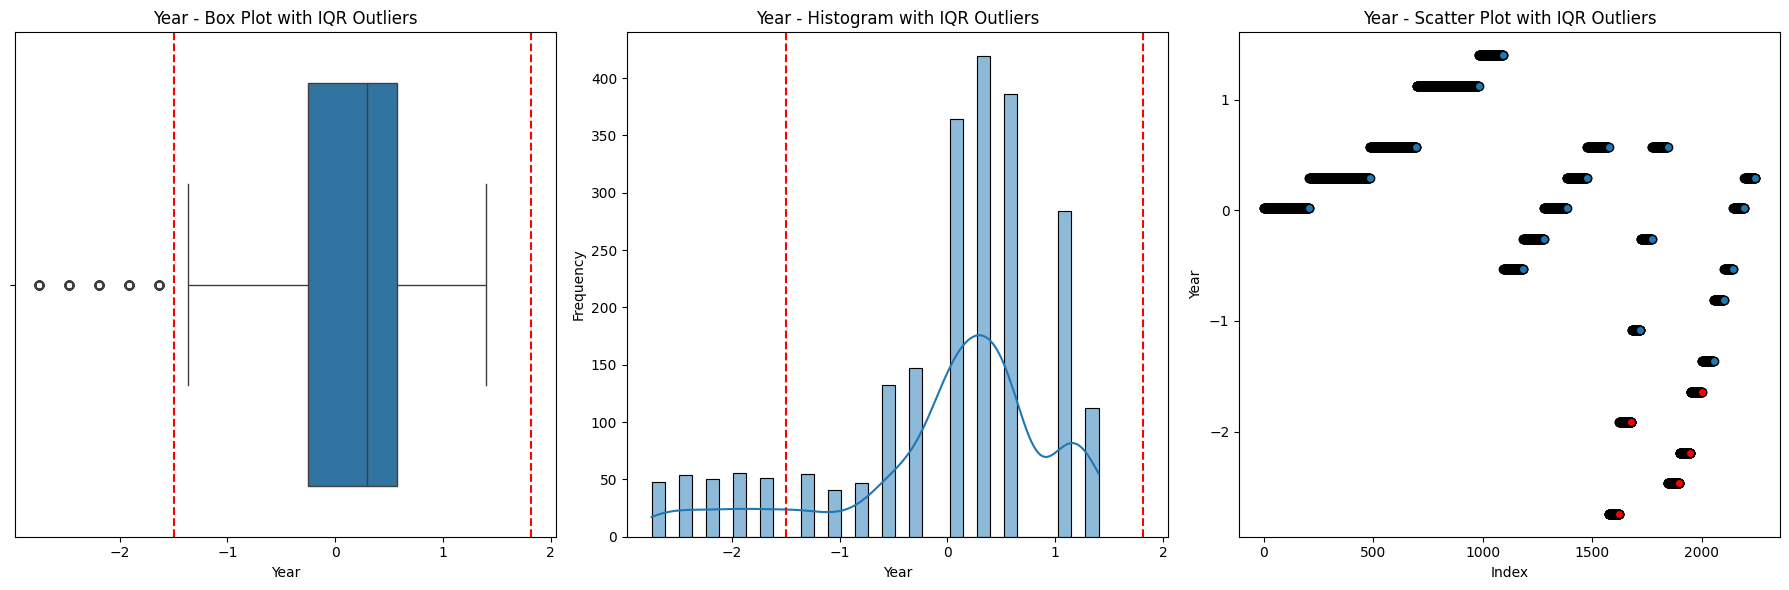

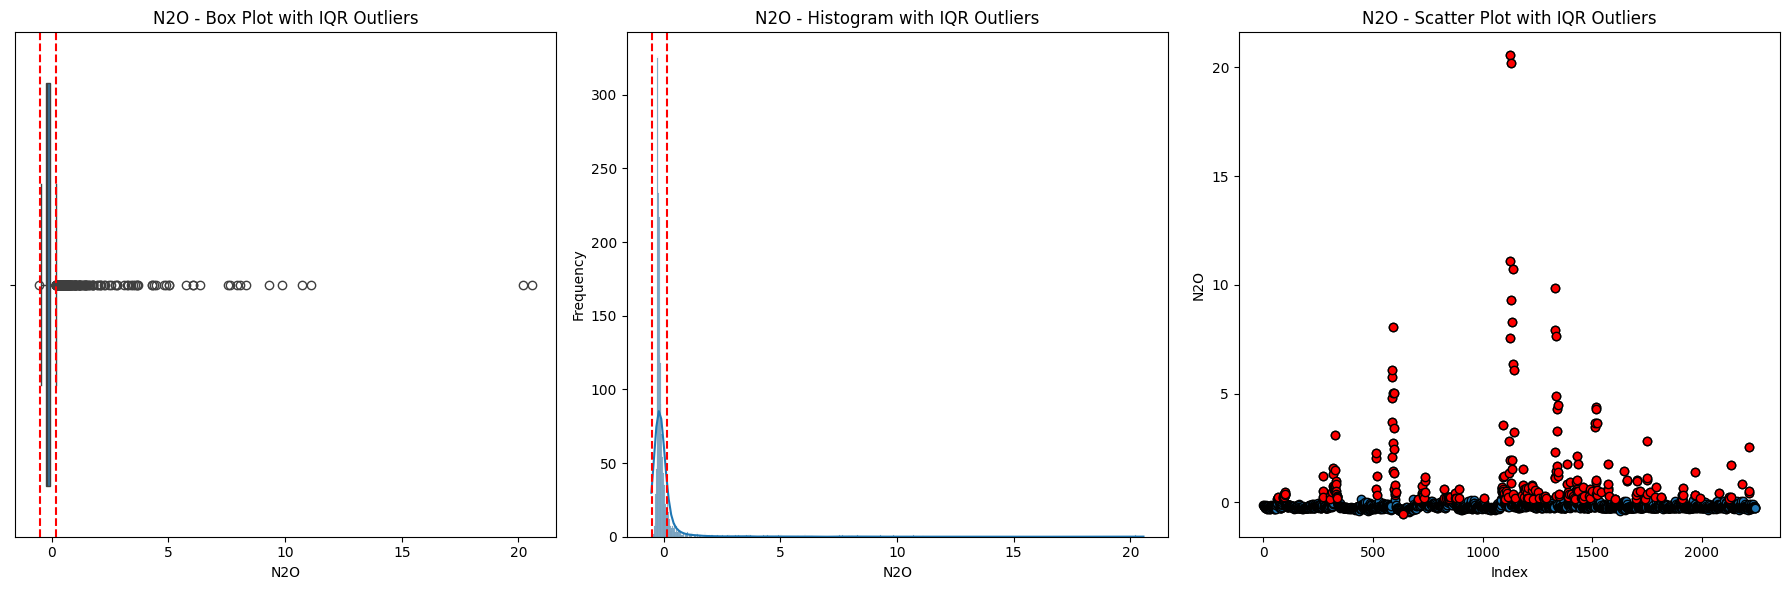

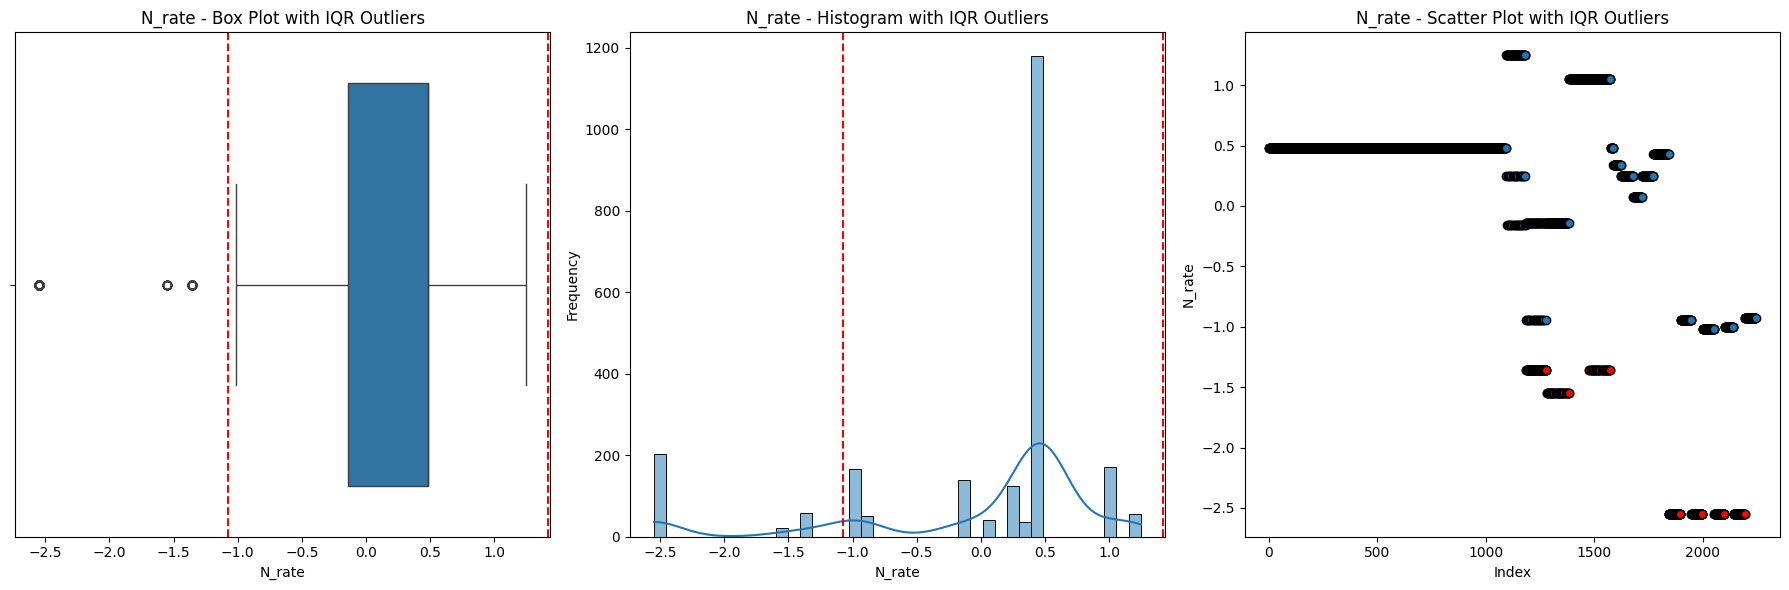

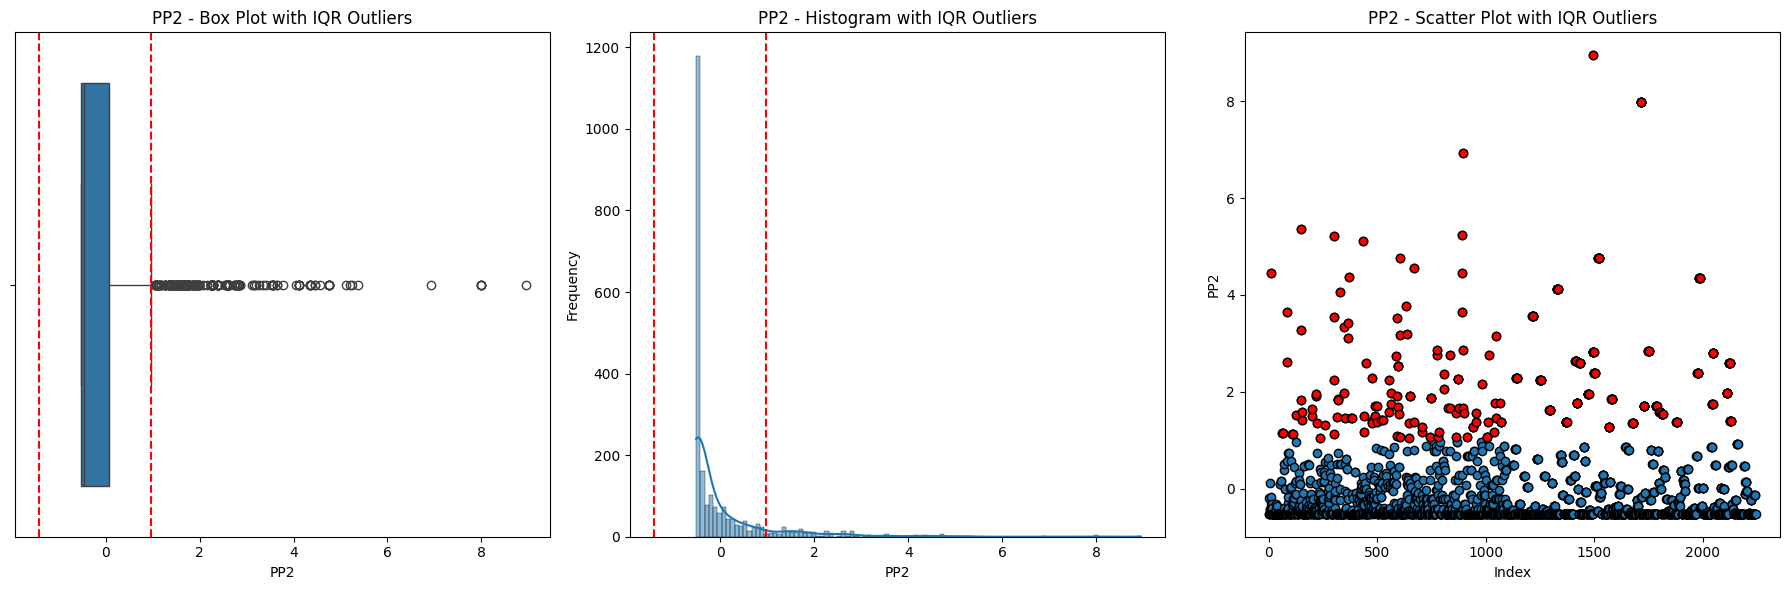

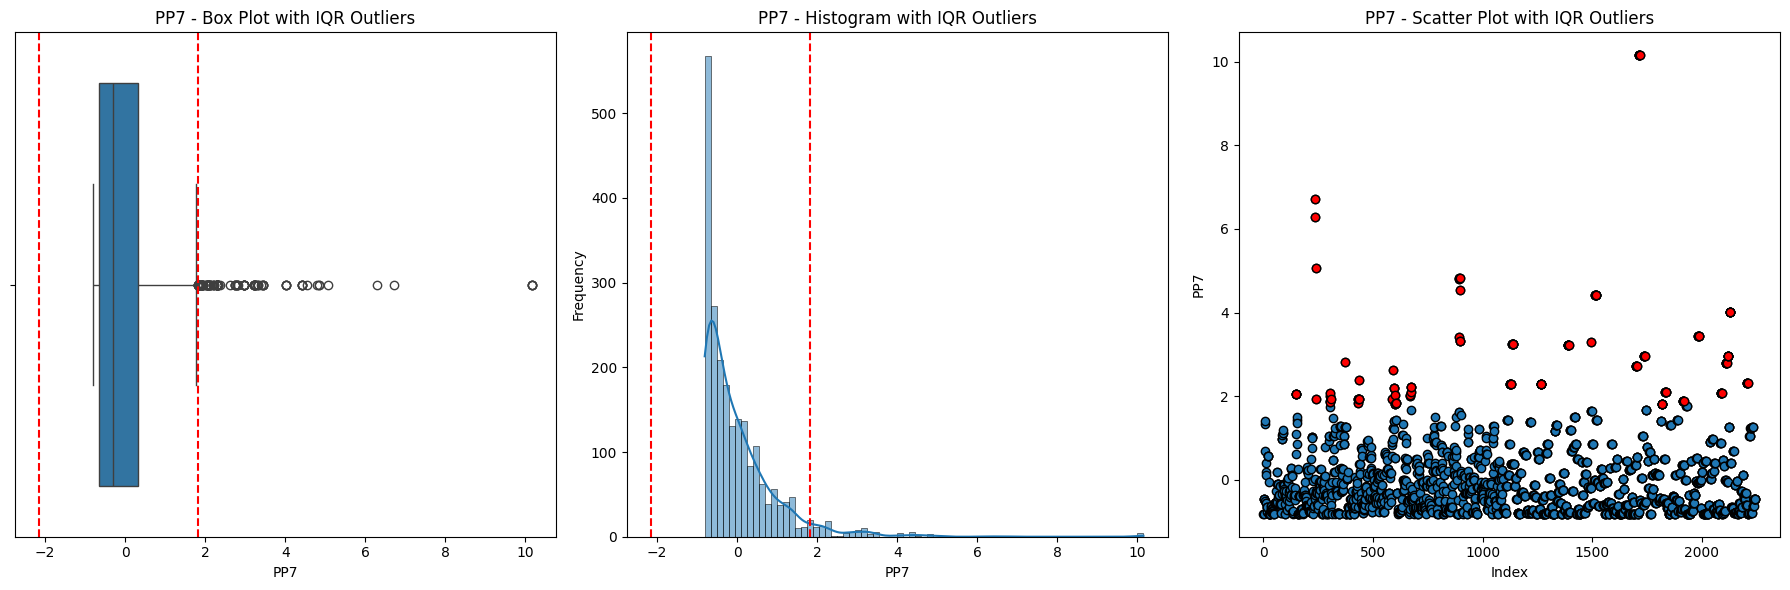

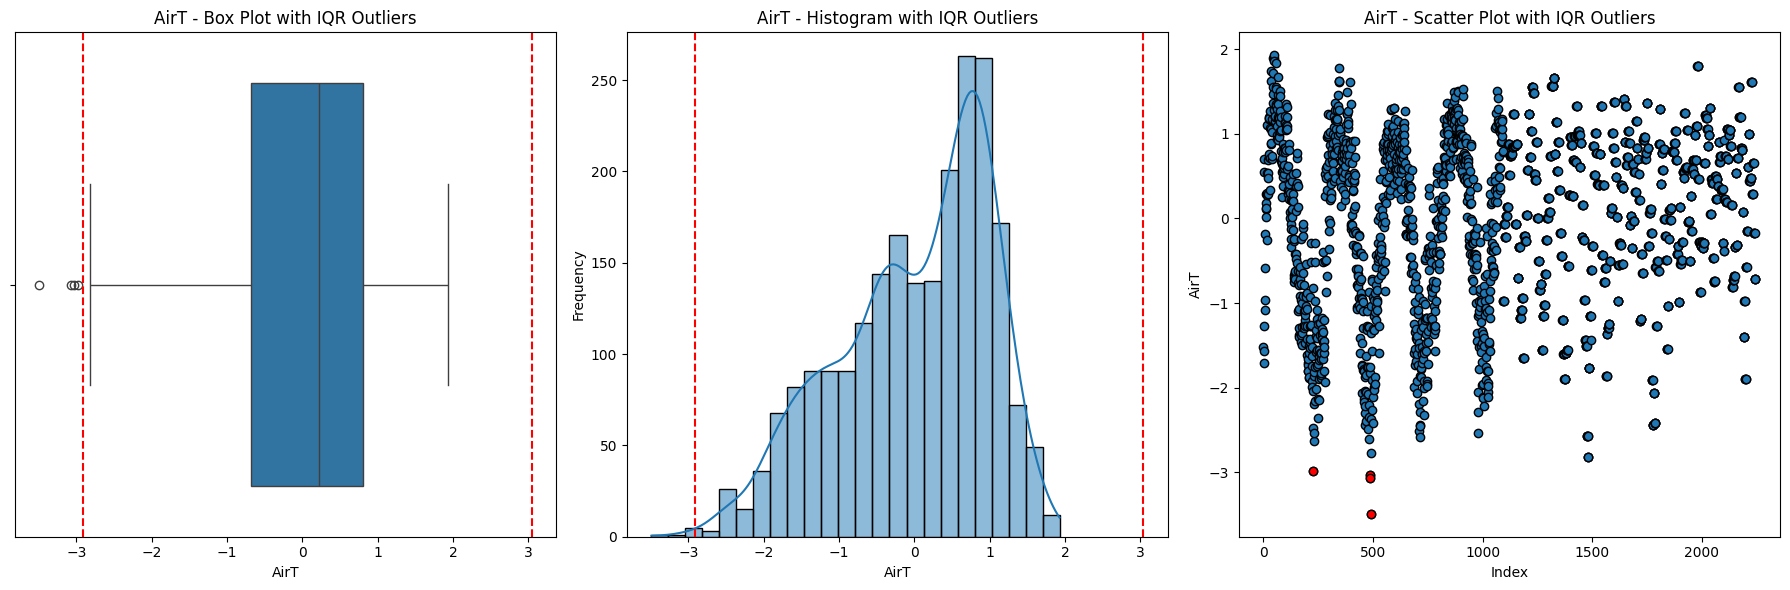

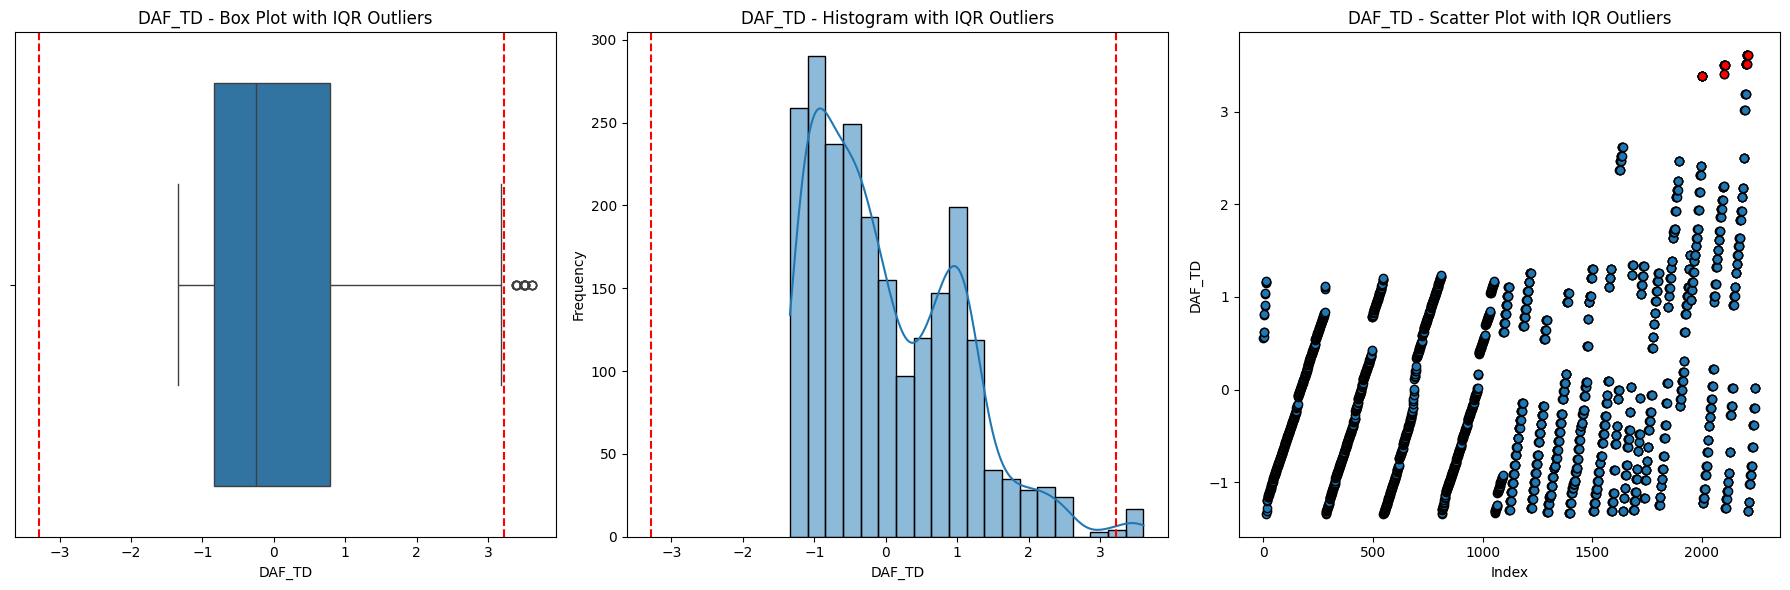

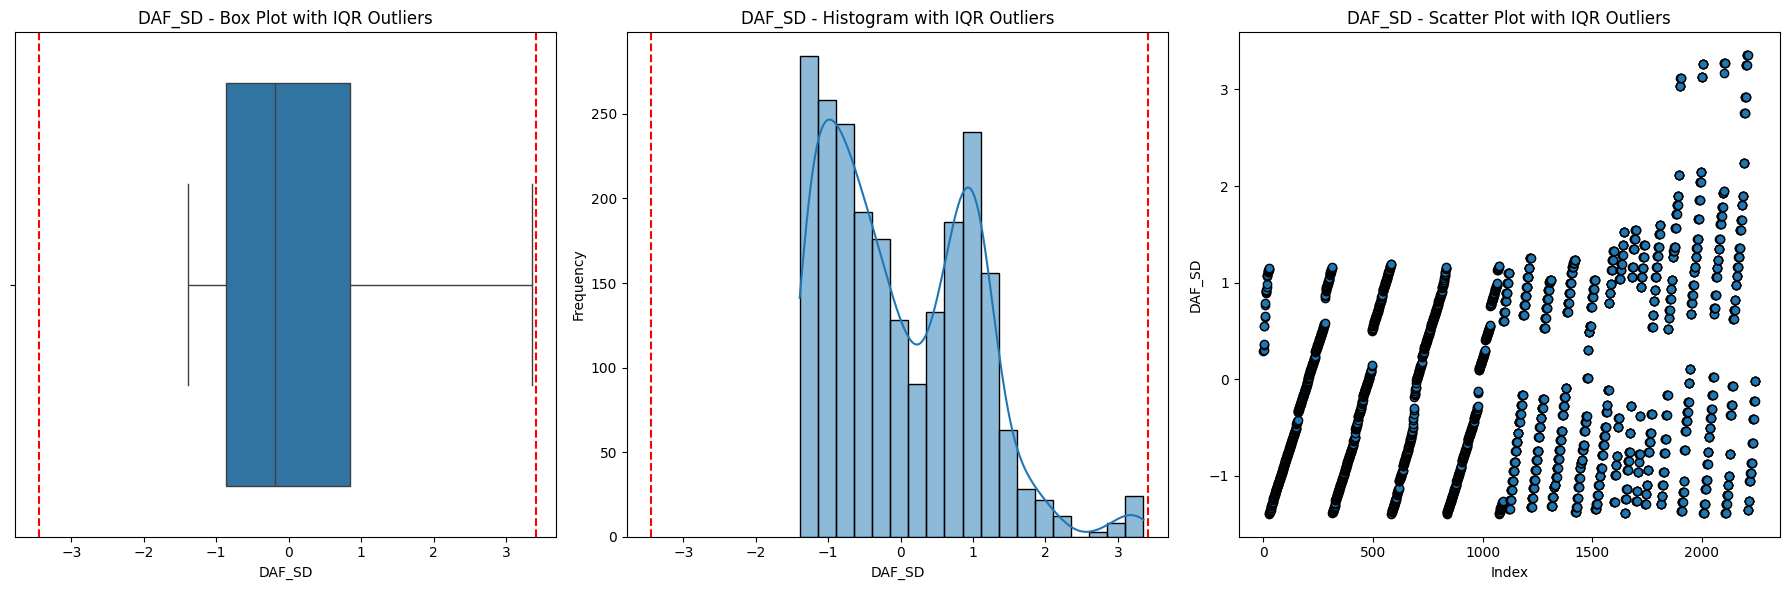

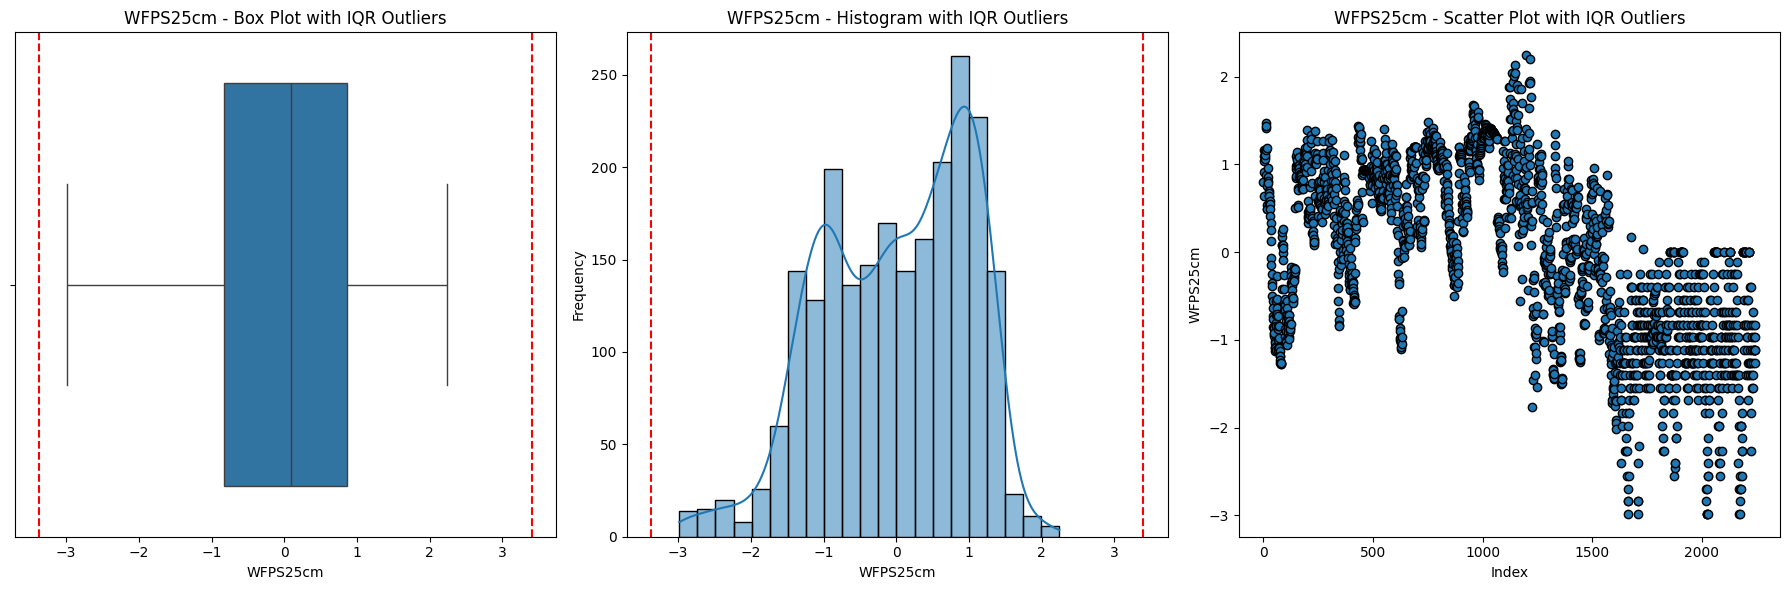

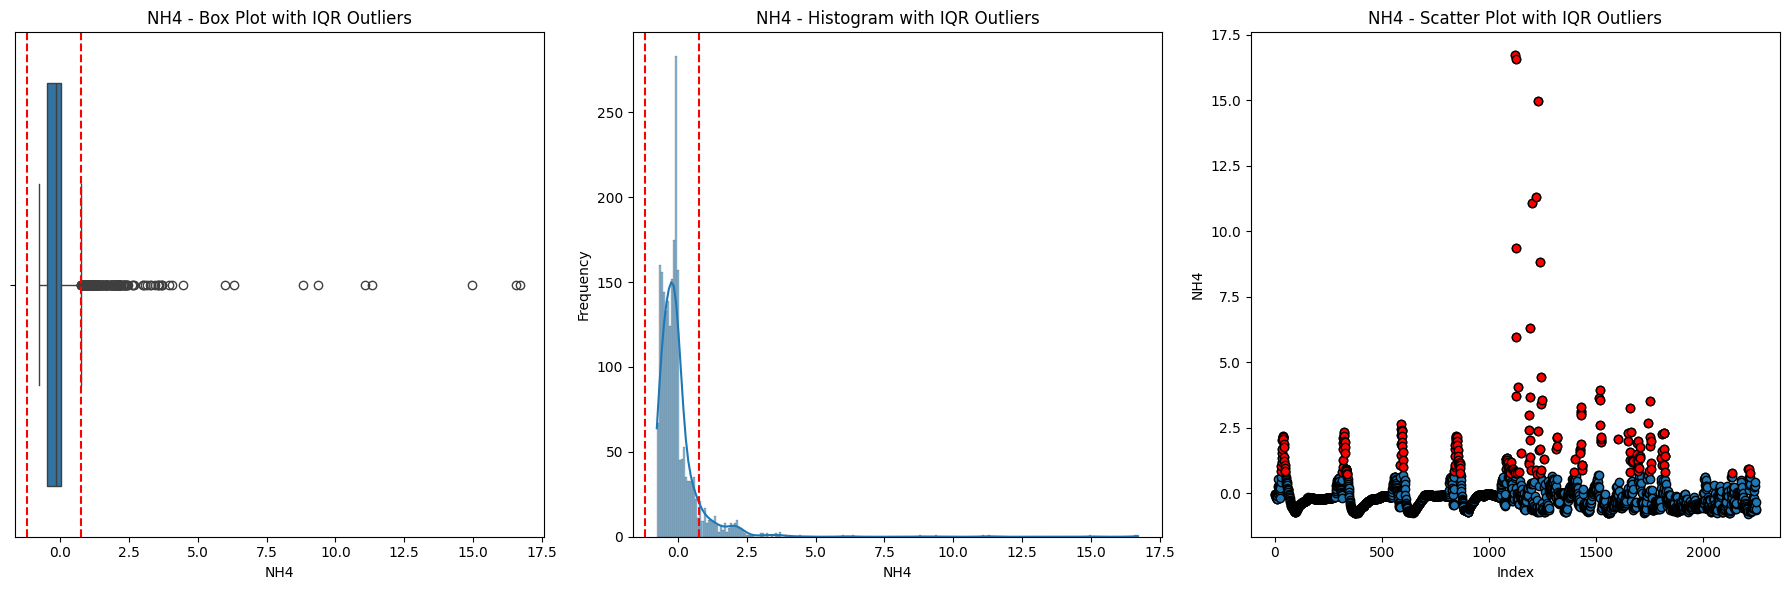

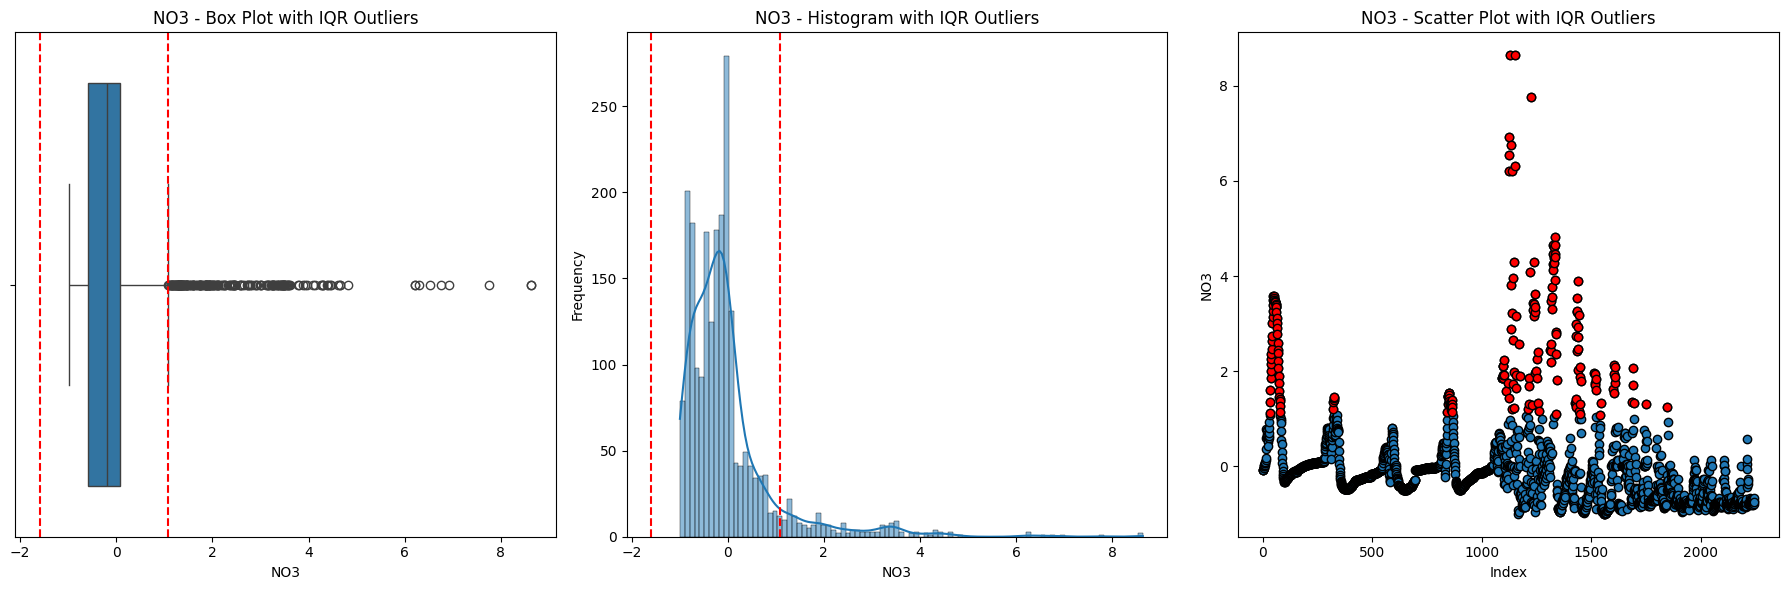

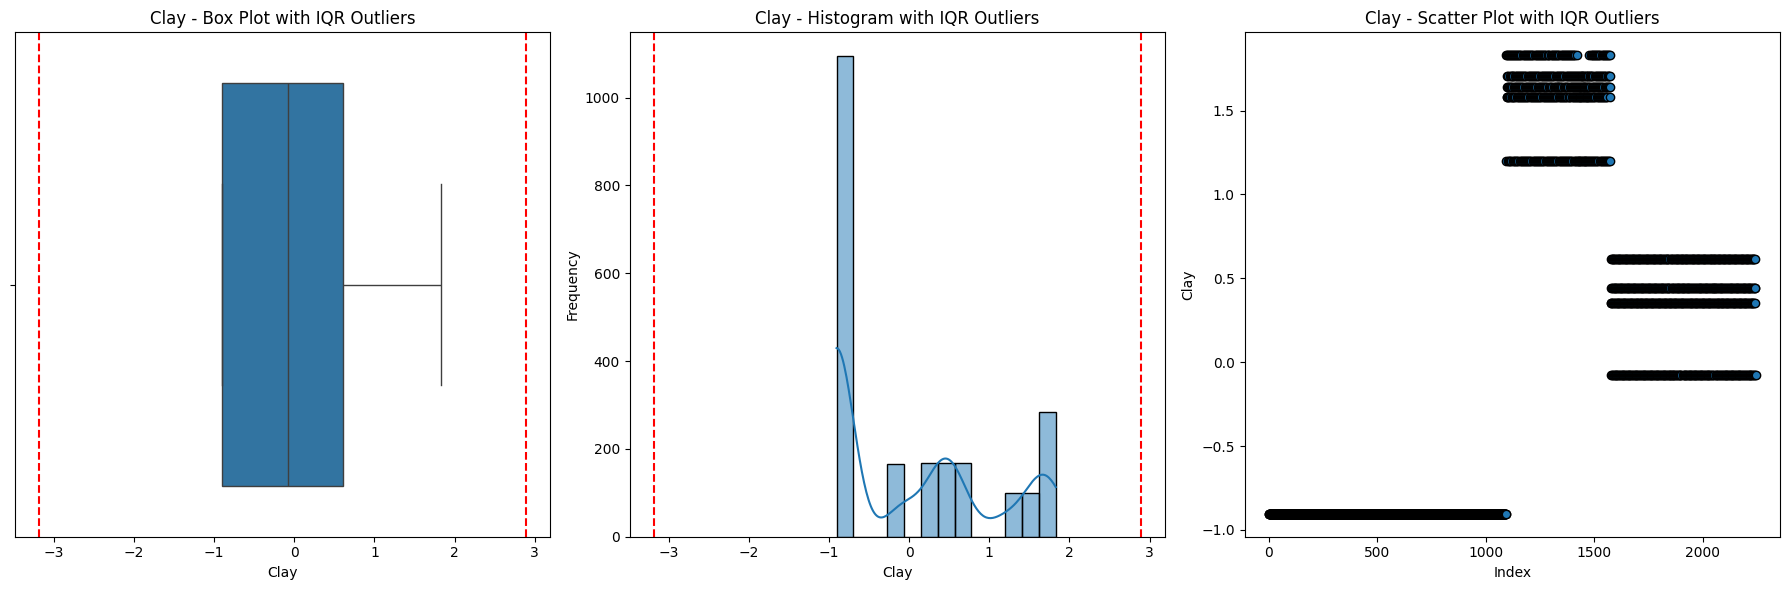

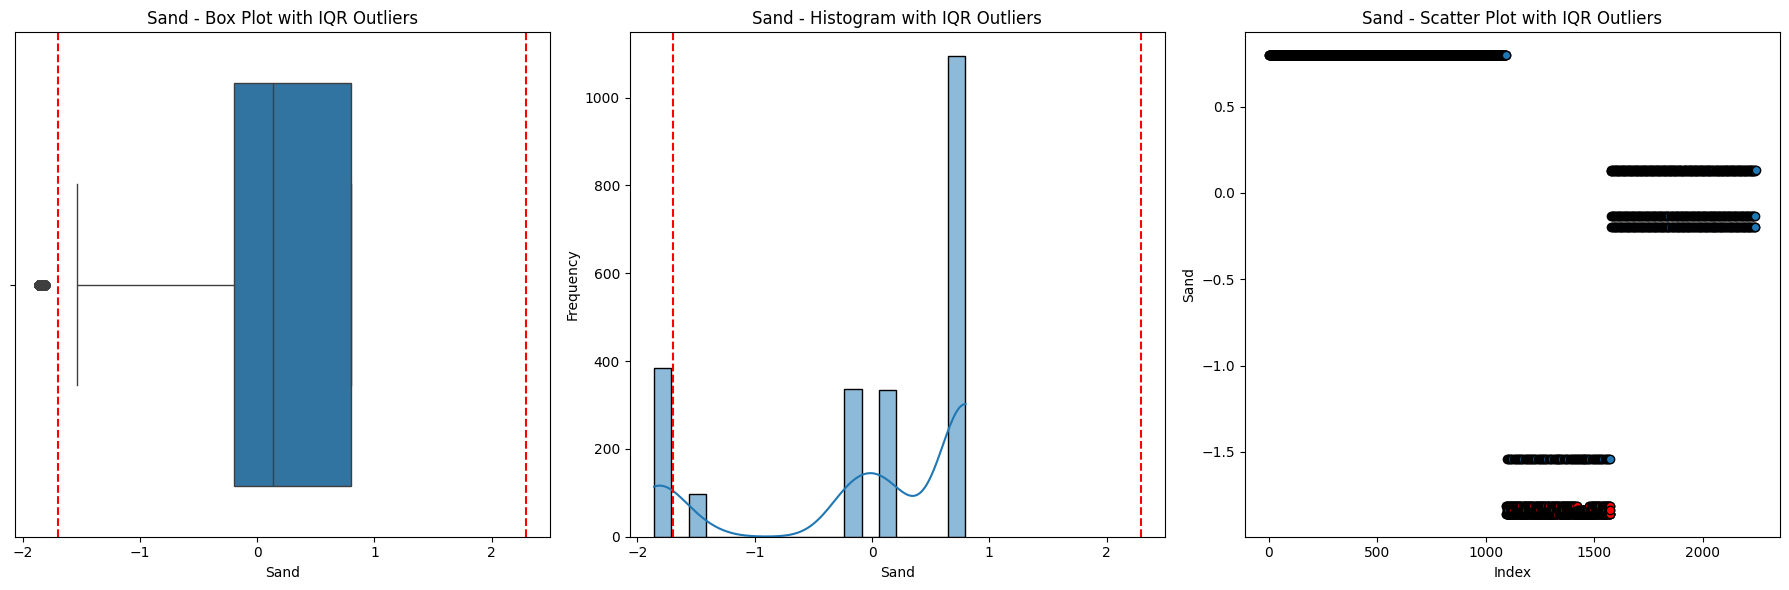

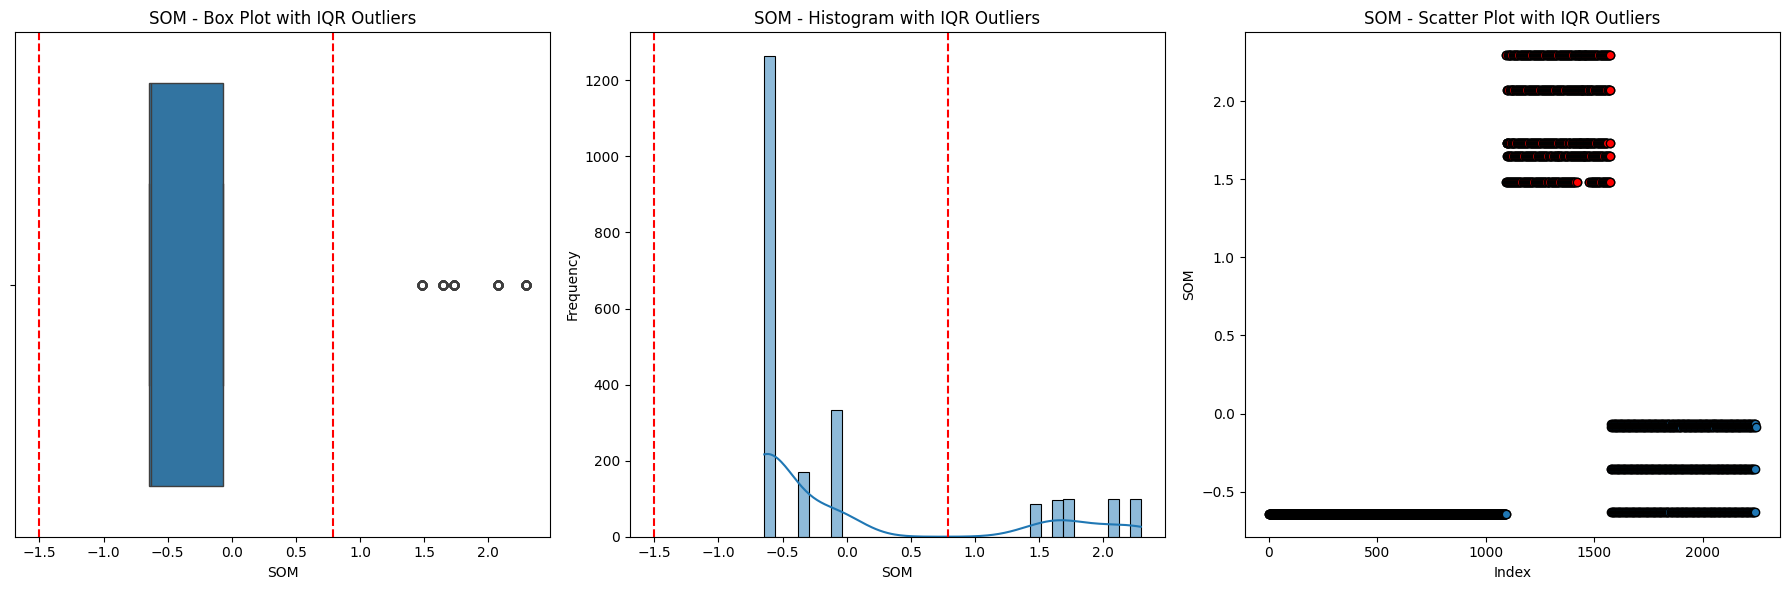

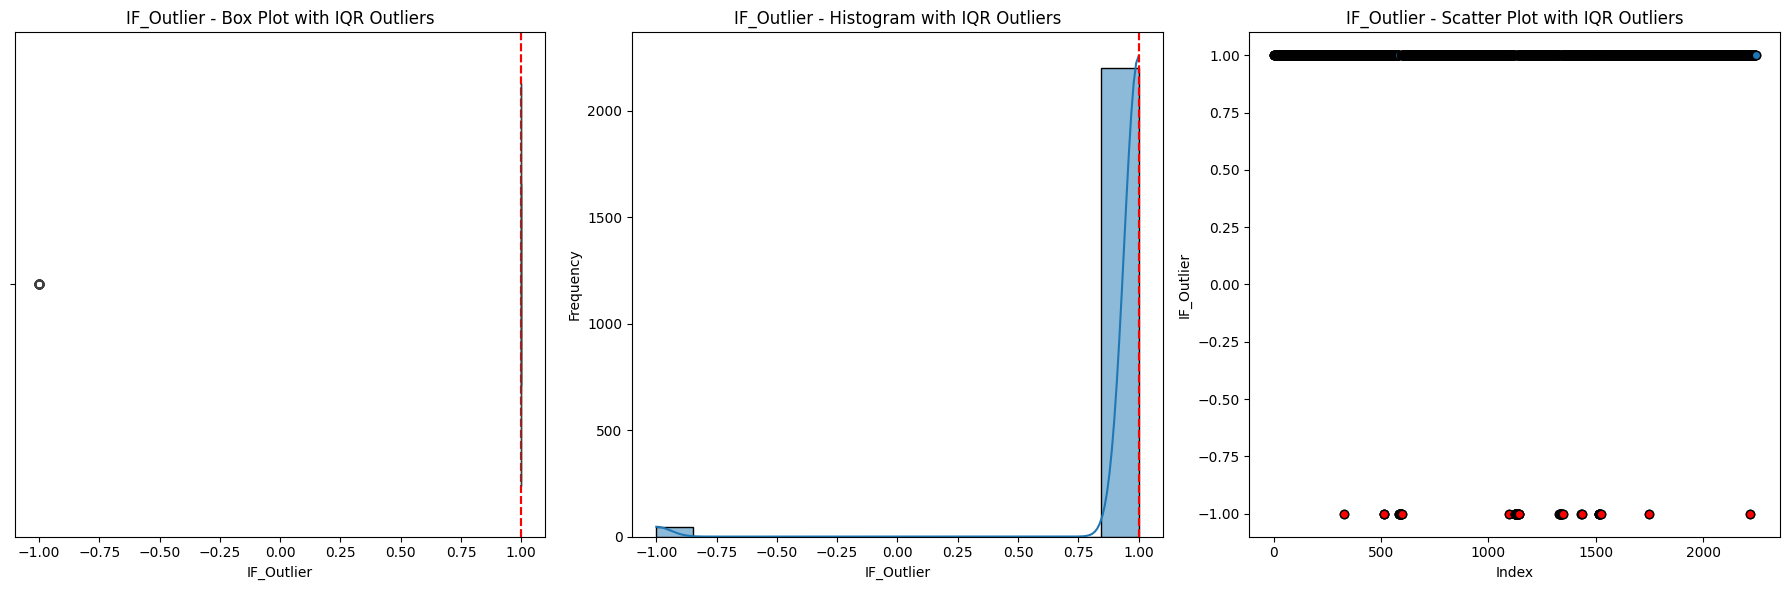

In [84]:
# Visualize the outliers using box plots, histograms, and scatter plots
for col in numerical_columns:
    lower_bound_IQR, upper_bound_IQR = iqr_bounds(data[col])

    outliers_IQR = data[(data[col] < lower_bound_IQR) | (data[col] > upper_bound_IQR)][col]

    # Create a figure with 1 row and 3 columns
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Box Plot - IQR Outliers
    sns.boxplot(x=data[col], ax=axs[0])
    axs[0].set_title(f'{col} - Box Plot with IQR Outliers')
    axs[0].axvline(lower_bound_IQR, color='r', linestyle='--')
    axs[0].axvline(upper_bound_IQR, color='r', linestyle='--')
    axs[0].set_xlabel(col)

    # Histogram - IQR Outliers
    sns.histplot(data[col], kde=True, ax=axs[1])
    axs[1].set_title(f'{col} - Histogram with IQR Outliers')
    axs[1].axvline(lower_bound_IQR, color='r', linestyle='--')
    axs[1].axvline(upper_bound_IQR, color='r', linestyle='--')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Frequency')

    # Scatter Plot - IQR Outliers
    axs[2].scatter(data.index, data[col], edgecolor='k')
    axs[2].scatter(outliers_IQR.index, outliers_IQR, color='r', edgecolor='k')
    axs[2].set_title(f'{col} - Scatter Plot with IQR Outliers')
    axs[2].set_xlabel('Index')
    axs[2].set_ylabel(col)

    # Adjust layout
    plt.tight_layout()
      # Save the figure as PNG file
    plt.savefig(f'visual/002_0_{col}_IQR_Outlier_Visualization.png')
    plt.show()


In [85]:
# # Visualize the outliers using box plots, histograms, and scatter plots
# for col in numerical_columns:
#     lower_bound_IQR, upper_bound_IQR = iqr_bounds(data[col])

#     outliers_IQR = data[(data[col] < lower_bound_IQR) | (data[col] > upper_bound_IQR)][col]

#     fig, axs = plt.subplots(3, 2, figsize=(10, 12))

#     # Box Plot - IQR Outliers
#     sns.boxplot(x=data[col], ax=axs[0, 0])
#     axs[0, 0].set_title(f'{col} - Box Plot with IQR Outliers')
#     axs[0, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
#     axs[0, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
#     axs[0, 0].set_xlabel(col)

#     # Histogram - IQR Outliers
#     sns.histplot(data[col], kde=True, ax=axs[1, 0])
#     axs[1, 0].set_title(f'{col} - Histogram with IQR Outliers')
#     axs[1, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
#     axs[1, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
#     axs[1, 0].set_xlabel(col)
#     axs[1, 0].set_ylabel('Frequency')

#     # Scatter Plot - IQR Outliers
#     axs[2, 0].scatter(data.index, data[col], edgecolor='k')
#     axs[2, 0].scatter(outliers_IQR.index, outliers_IQR, color='r', edgecolor='k')
#     axs[2, 0].set_title(f'{col} - Scatter Plot with IQR Outliers')
#     axs[2, 0].set_xlabel('Index')
#     axs[2, 0].set_ylabel(col)

#     # Adjust layout
#     plt.tight_layout()
#     plt.show()

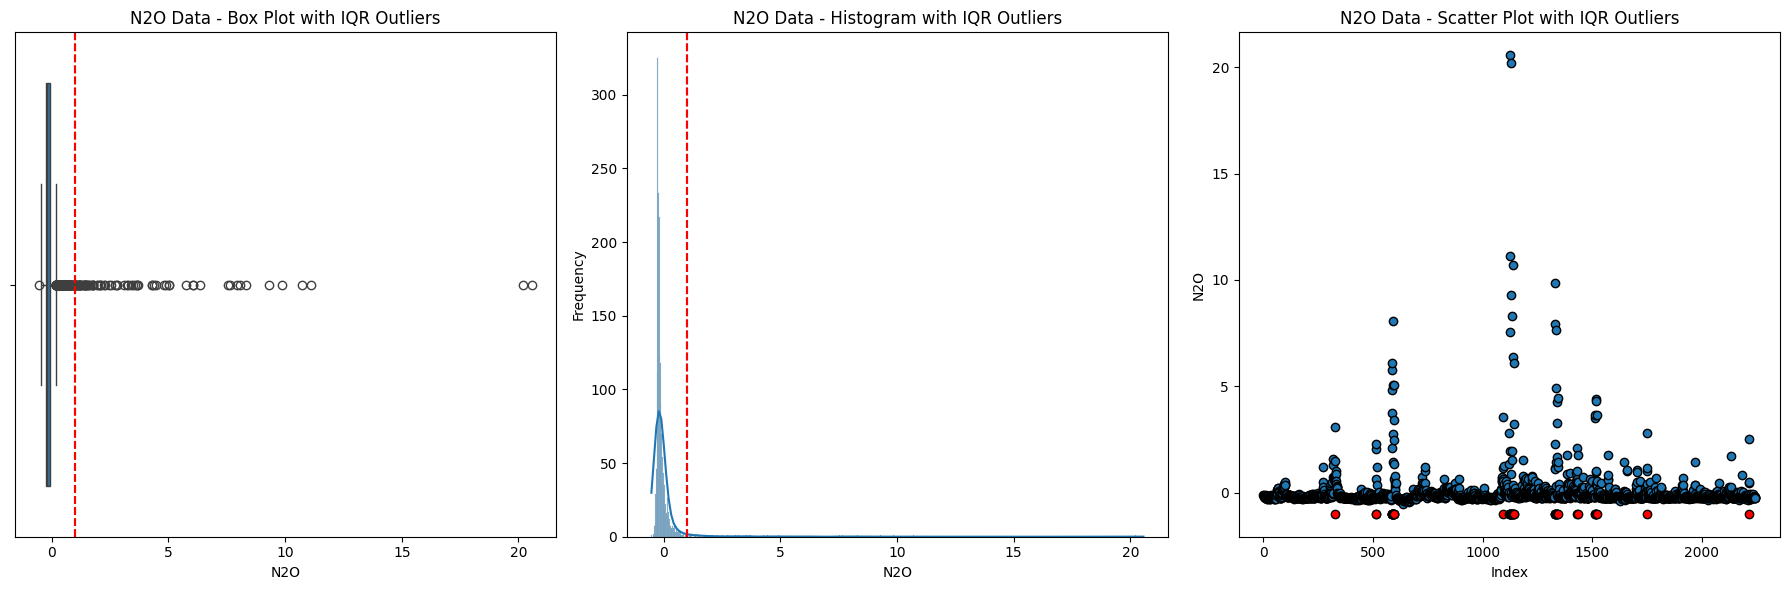

In [86]:
# Visualize the outliers using box plots, histograms, and scatter plots in 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Box Plot - N2O Data with IQR Outliers
sns.boxplot(x=N2O_data, ax=axs[0])
axs[0].set_title('N2O Data - Box Plot with IQR Outliers')
axs[0].axvline(lower_bound_IQR, color='r', linestyle='--')
axs[0].axvline(upper_bound_IQR, color='r', linestyle='--')
axs[0].set_xlabel('N2O')

# Histogram - N2O Data with IQR Outliers
sns.histplot(N2O_data, kde=True, ax=axs[1])
axs[1].set_title('N2O Data - Histogram with IQR Outliers')
axs[1].axvline(lower_bound_IQR, color='r', linestyle='--')
axs[1].axvline(upper_bound_IQR, color='r', linestyle='--')
axs[1].set_xlabel('N2O')
axs[1].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IQR Outliers
axs[2].scatter(N2O_data.index, N2O_data, edgecolor='k')
axs[2].scatter(outliers_IQR.index, outliers_IQR, color='r', edgecolor='k')
axs[2].set_title('N2O Data - Scatter Plot with IQR Outliers')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('N2O')

# Adjust layout
plt.tight_layout()
plt.savefig('Visual/BeforeRemoveOutliers/002_1_N2O_IQR_WithOutlier.png')
plt.show()


In [87]:


# # Display the summary table
# # import ace_tools as tools; tools.display_dataframe_to_user(name="N2O Outlier Summary", dataframe=summary_table)

# # Visualize the outliers using box plots and scatter plots
# fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# # Box Plot - N2O Data with IQR Outliers
# sns.boxplot(x=N2O_data, ax=axs[0, 0])
# axs[0, 0].set_title('N2O Data - Box Plot with IQR Outliers')
# axs[0, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
# axs[0, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
# axs[0, 0].set_xlabel('N2O')

# # Histogram - N2O Data with IQR Outliers
# sns.histplot(N2O_data, kde=True, ax=axs[1, 0])
# axs[1, 0].set_title('N2O Data - Histogram with IQR Outliers')
# axs[1, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
# axs[1, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
# axs[1, 0].set_xlabel('N2O')
# axs[1, 0].set_ylabel('Frequency')

# # Scatter Plot - N2O Data with IQR Outliers
# axs[2, 0].scatter(N2O_data.index, N2O_data, edgecolor='k')
# axs[2, 0].scatter(outliers_IQR.index, outliers_IQR, color='r', edgecolor='k')
# axs[2, 0].set_title('N2O Data - Scatter Plot with IQR Outliers')
# axs[2, 0].set_xlabel('Index')
# axs[2, 0].set_ylabel('N2O')

# # Adjust layout
# plt.tight_layout()
# plt.show()

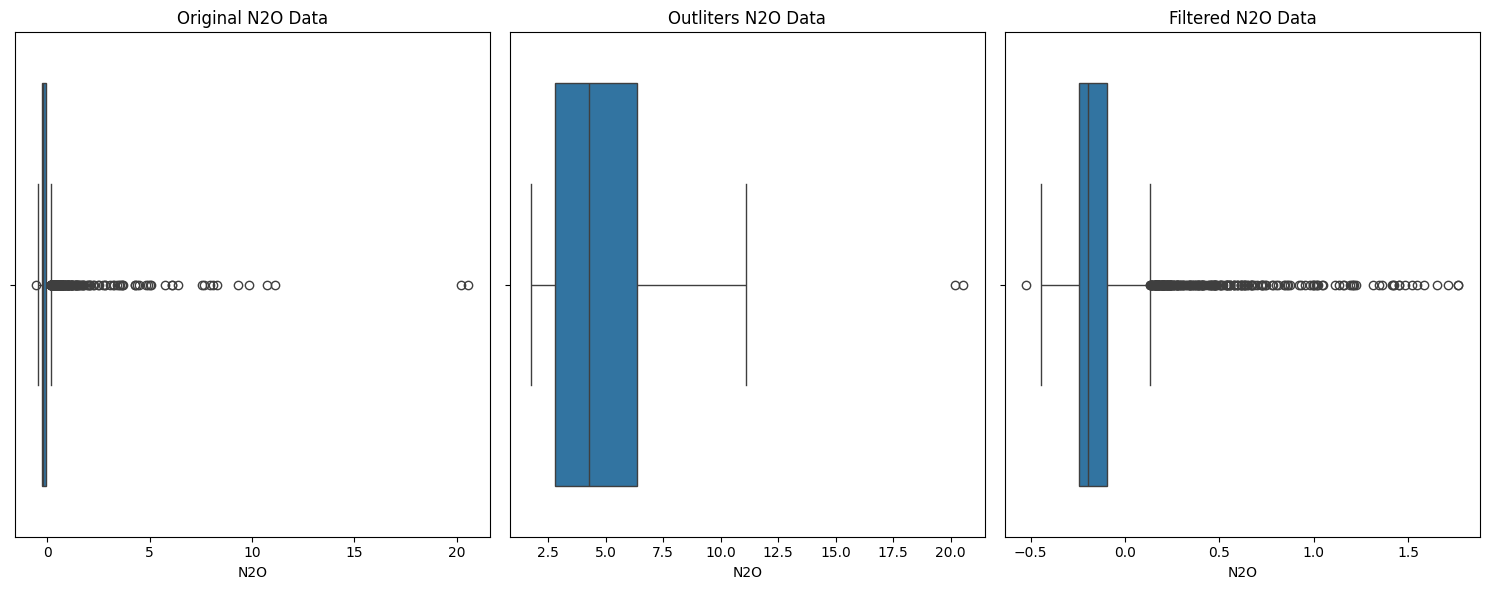

In [88]:
# Box Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['N2O'])
plt.title('Original N2O Data')

plt.subplot(1, 3, 2)
sns.boxplot(x=outliers_data['N2O'])
plt.title('Outliters N2O Data')

plt.subplot(1, 3, 3)
sns.boxplot(x=filtered_data['N2O'])
plt.title('Filtered N2O Data')


plt.tight_layout()
# outliers_data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/003_2.after_outlier_detection_outliersonly_IF.csv', index=False)
# print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")
plt.savefig('Visual/BeforeRemoveOutliers/002_2_N2O_IF_DataCompasion.png')
plt.show()




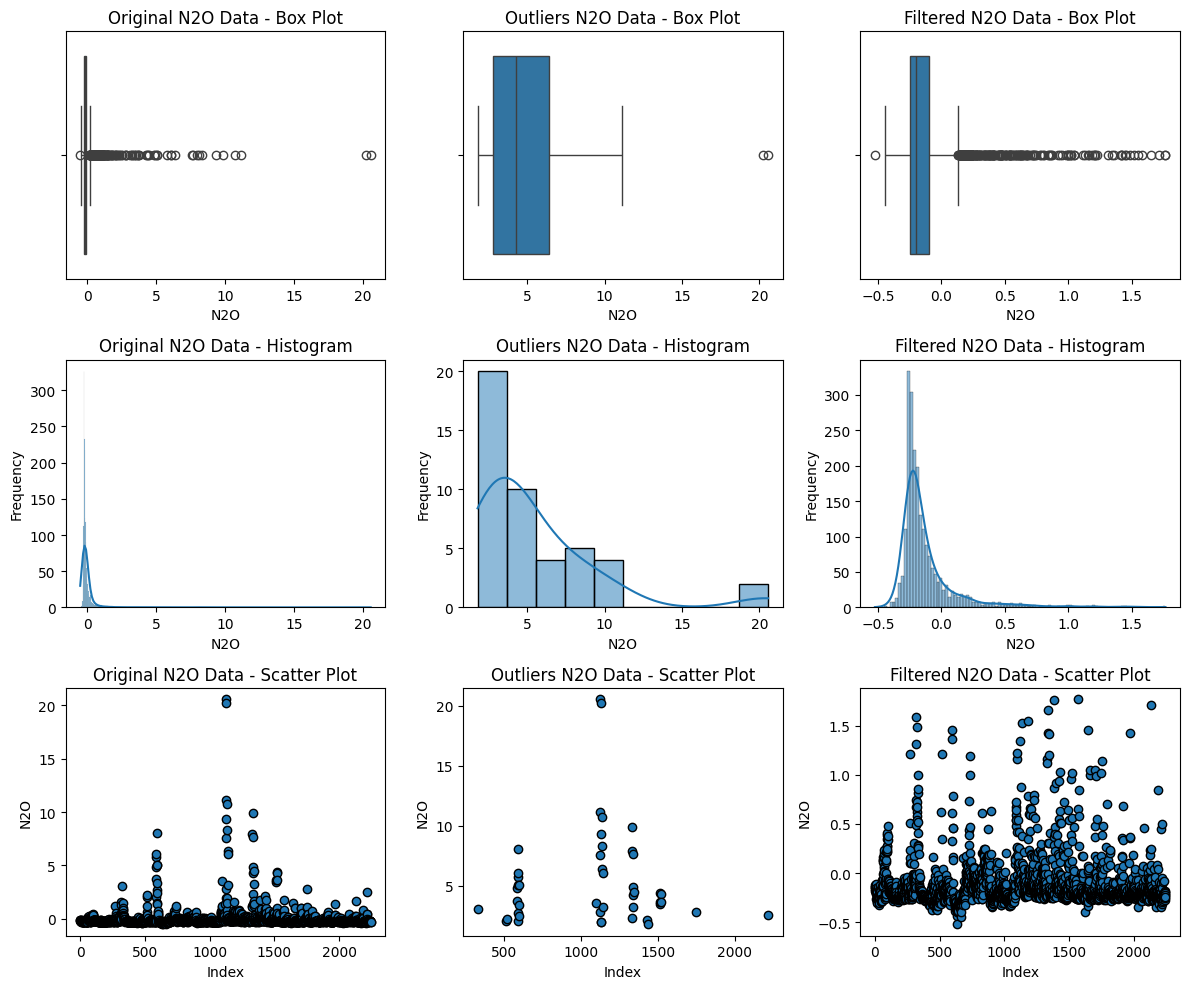

In [89]:
# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(3, 3, figsize=(12, 10))


# Box Plot - Original N2O Data
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('Original N2O Data - Box Plot')
axs[0, 0].set_xlabel('N2O')

# Box Plot - Outliers N2O Data
sns.boxplot(x=outliers_data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('Outliers N2O Data - Box Plot')
axs[0, 1].set_xlabel('N2O')

# Box Plot - Filtered N2O Data
sns.boxplot(x=filtered_data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('Filtered N2O Data - Box Plot')
axs[0, 2].set_xlabel('N2O')

# Histogram - Original N2O Data
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Original N2O Data - Histogram')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - Filtered N2O Data
sns.histplot(outliers_data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Outliers N2O Data - Histogram')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - Filtered N2O Data
sns.histplot(filtered_data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('Filtered N2O Data - Histogram')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - Original N2O Data
axs[2, 0].scatter(data.index, data['N2O'], edgecolor='k')
axs[2, 0].set_title('Original N2O Data - Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - Filtered N2O Data
axs[2, 1].scatter(outliers_data.index, outliers_data['N2O'], edgecolor='k')
axs[2, 1].set_title('Outliers N2O Data - Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Scatter Plot - Filtered N2O Data
axs[2, 2].scatter(filtered_data.index, filtered_data['N2O'], edgecolor='k')
axs[2, 2].set_title('Filtered N2O Data - Scatter Plot')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')

# Adjust layout
# outliers_data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/003_2.after_outlier_detection_outliersonly_IF.csv', index=False)
# print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")
plt.savefig('Visual/BeforeRemoveOutliers/002_3_N2O_IF_ComparisonGraphics.png')
plt.tight_layout()
plt.show()

## Detect Outliers with DBSCAN

In [90]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['DBSCAN_Outlier'] = dbscan_pred
data.to_csv('hasil/BeforeRemoveOutliers/004_0.after_outlier_detected_DBSCAN.csv', index=False)



In [91]:
if_outliers_count = (data['DBSCAN_Outlier'] == -1).sum()

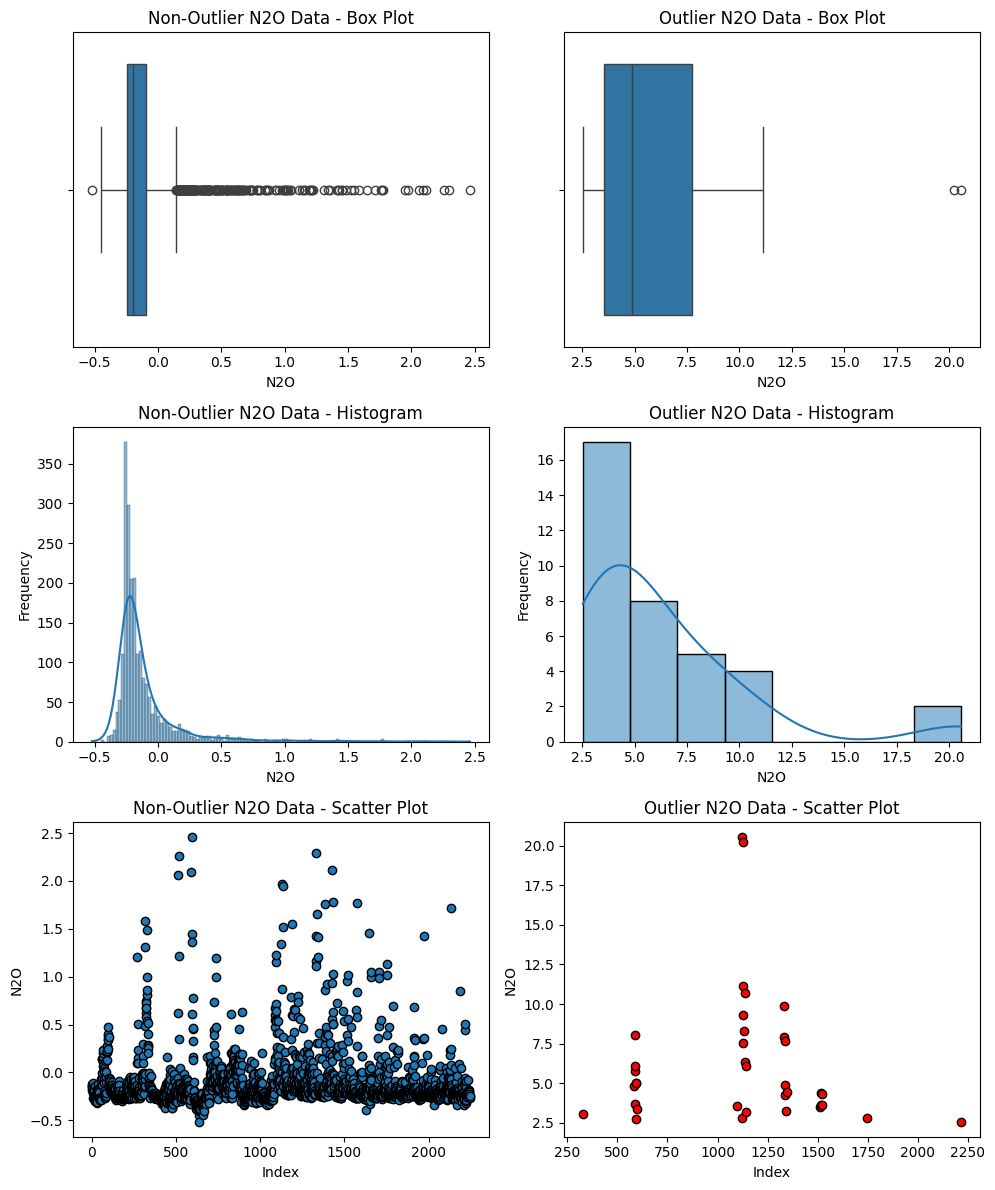

In [92]:

# Separate outliers and non-outliers
outliers = data[data['DBSCAN_Outlier'] == -1]
non_outliers = data[data['DBSCAN_Outlier'] != -1]

# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Box Plot - Original N2O Data
sns.boxplot(x=non_outliers['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('Non-Outlier N2O Data - Box Plot')
axs[0, 0].set_xlabel('N2O')

# Box Plot - Outlier N2O Data
sns.boxplot(x=outliers['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('Outlier N2O Data - Box Plot')
axs[0, 1].set_xlabel('N2O')

# Histogram - Non-Outlier N2O Data
sns.histplot(non_outliers['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Non-Outlier N2O Data - Histogram')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - Outlier N2O Data
sns.histplot(outliers['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Outlier N2O Data - Histogram')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Scatter Plot - Non-Outlier N2O Data
axs[2, 0].scatter(non_outliers.index, non_outliers['N2O'], edgecolor='k')
axs[2, 0].set_title('Non-Outlier N2O Data - Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - Outlier N2O Data
axs[2, 1].scatter(outliers.index, outliers['N2O'], edgecolor='k', color='red')
axs[2, 1].set_title('Outlier N2O Data - Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')
# print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")
plt.savefig('Visual/BeforeRemoveOutliers/002_1_N2O_DBSCAN_Outlier_Detection.png')
# Adjust layout
plt.tight_layout()
plt.show()

# Display filtered data without outliers
filtered_data = non_outliers.drop(columns=['DBSCAN_Outlier'])


## Detect Outlier with OneClass SVM

In [93]:
N2O_data = data[['N2O']]
# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.02)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['OCSVM_Outlier'] = ocsvm_pred
data.to_csv('hasil/BeforeRemoveOutliers/005_0.after_outlier_detected_OCSVM.csv', index=False)


In [94]:

# Separate outliers and non-outliers
outliers = data[data['OCSVM_Outlier'] == -1]
non_outliers = data[data['OCSVM_Outlier'] != -1]

# Summary of results
outlier_count = outliers.shape[0]
summary_table = pd.DataFrame({
    'Method': ['One-Class SVM'],
    'Outlier Count': [outlier_count]
})

# Save the summary table to a CSV file
summary_file_path = 'hasil/BeforeRemoveOutliers/005_1.N2O_outlier_summary_ocsvm.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)


          Method  Outlier Count
0  One-Class SVM             45


          Method  Outlier Count
0  One-Class SVM             45


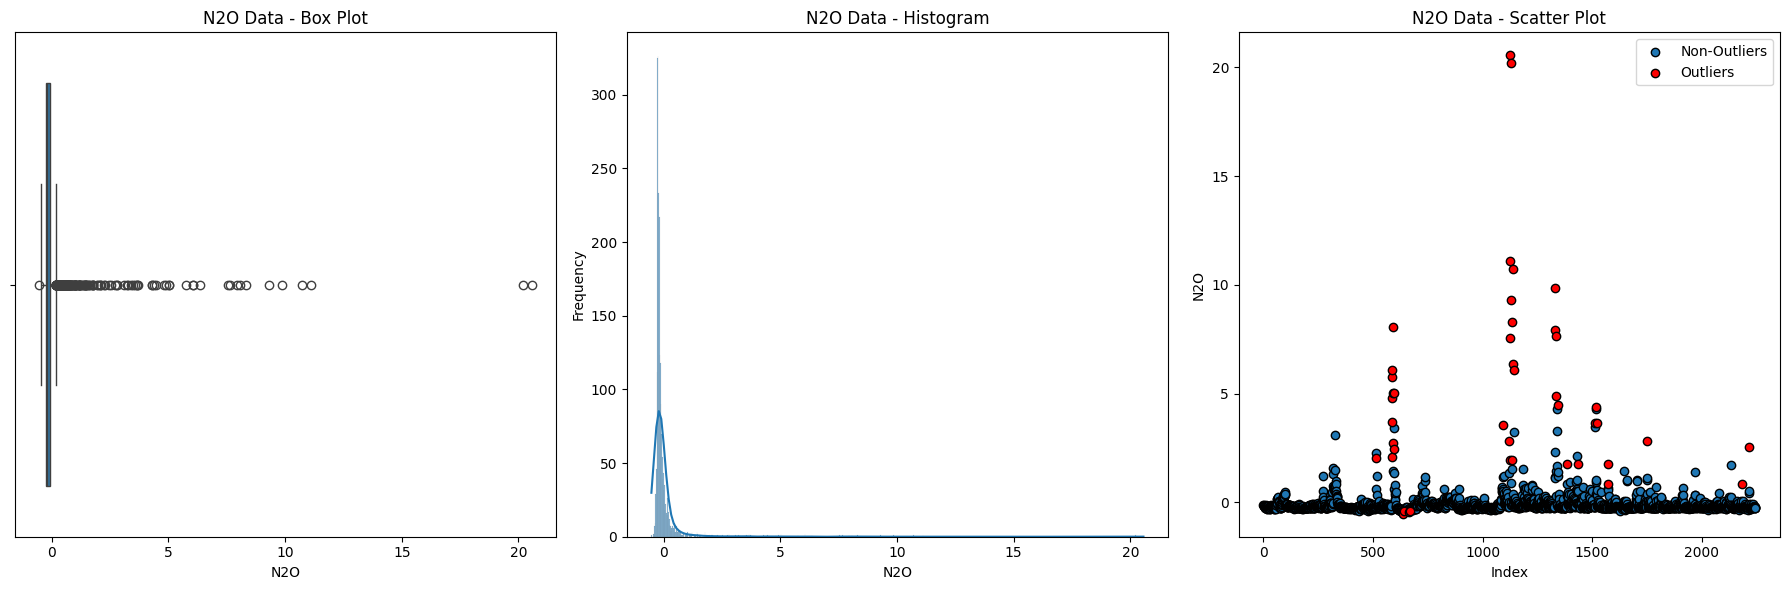

In [95]:
# Separate outliers and non-outliers
outliers = data[data['OCSVM_Outlier'] == -1]
non_outliers = data[data['OCSVM_Outlier'] != -1]

# Summary of results
outlier_count = outliers.shape[0]
summary_table = pd.DataFrame({
    'Method': ['One-Class SVM'],
    'Outlier Count': [outlier_count]
})

# Save the summary table to a CSV file
summary_file_path = 'hasil/BeforeRemoveOutliers/005_1.N2O_outlier_summary_ocsvm.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Box Plot - N2O Data
sns.boxplot(x=data['N2O'], ax=axs[0])
axs[0].set_title('N2O Data - Box Plot')
axs[0].set_xlabel('N2O')

# Histogram - N2O Data
sns.histplot(data['N2O'], kde=True, ax=axs[1])
axs[1].set_title('N2O Data - Histogram')
axs[1].set_xlabel('N2O')
axs[1].set_ylabel('Frequency')

# Scatter Plot - N2O Data
axs[2].scatter(non_outliers.index, non_outliers['N2O'], label='Non-Outliers', edgecolor='k')
axs[2].scatter(outliers.index, outliers['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2].set_title('N2O Data - Scatter Plot')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('N2O')
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('Visual/BeforeRemoveOutliers/002_1_N2O_OCSVM_Outlier_Detection.png')

# Show the plot
plt.show()


In [96]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,0.294676,0.797637,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,0,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,0.301675,0.645128,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,0,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,0.357667,1.160223,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,0,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,0.364667,0.917547,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,0,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,0.546643,1.090364,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.223257,-0.829336,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,0,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.013285,-1.260143,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,0,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.013285,-1.116541,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,0,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.013285,-0.972939,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,0,1


## Detection Outlier Comparison

In [97]:
# # Extract the feature for outlier detection
# N2O_data = data[['N2O']]

# # Apply Isolation Forest
# iso = IsolationForest(contamination=0.05)
# iso_pred = iso.fit_predict(N2O_data)

# # Apply DBSCAN
# dbscan = DBSCAN(eps=0.3, min_samples=10)
# dbscan_pred = dbscan.fit_predict(N2O_data)

# # Apply One-Class SVM
# ocsvm = OneClassSVM(nu=0.05)
# ocsvm_pred = ocsvm.fit_predict(N2O_data)

# # Add the prediction results to the dataset
# data['IF_Outlier'] = iso_pred
# data['DBSCAN_Outlier'] = dbscan_pred
# data['OCSVM_Outlier'] = ocsvm_pred


In [98]:

# Separate outliers and non-outliers for each method
outliers_if = data[data['IF_Outlier'] == -1]
non_outliers_if = data[data['IF_Outlier'] != -1]

outliers_dbscan = data[data['DBSCAN_Outlier'] == -1]
non_outliers_dbscan = data[data['DBSCAN_Outlier'] != -1]

outliers_ocsvm = data[data['OCSVM_Outlier'] == -1]
non_outliers_ocsvm = data[data['OCSVM_Outlier'] != -1]

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [outliers_if.shape[0], outliers_dbscan.shape[0], outliers_ocsvm.shape[0]]
})

# Save the summary table to a CSV file
summary_file_path = 'hasil/BeforeRemoveOutliers/006.N2O_outlier_comparison_summary.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)


             Method  Outlier Count
0  Isolation Forest             45
1            DBSCAN             36
2     One-Class SVM             45


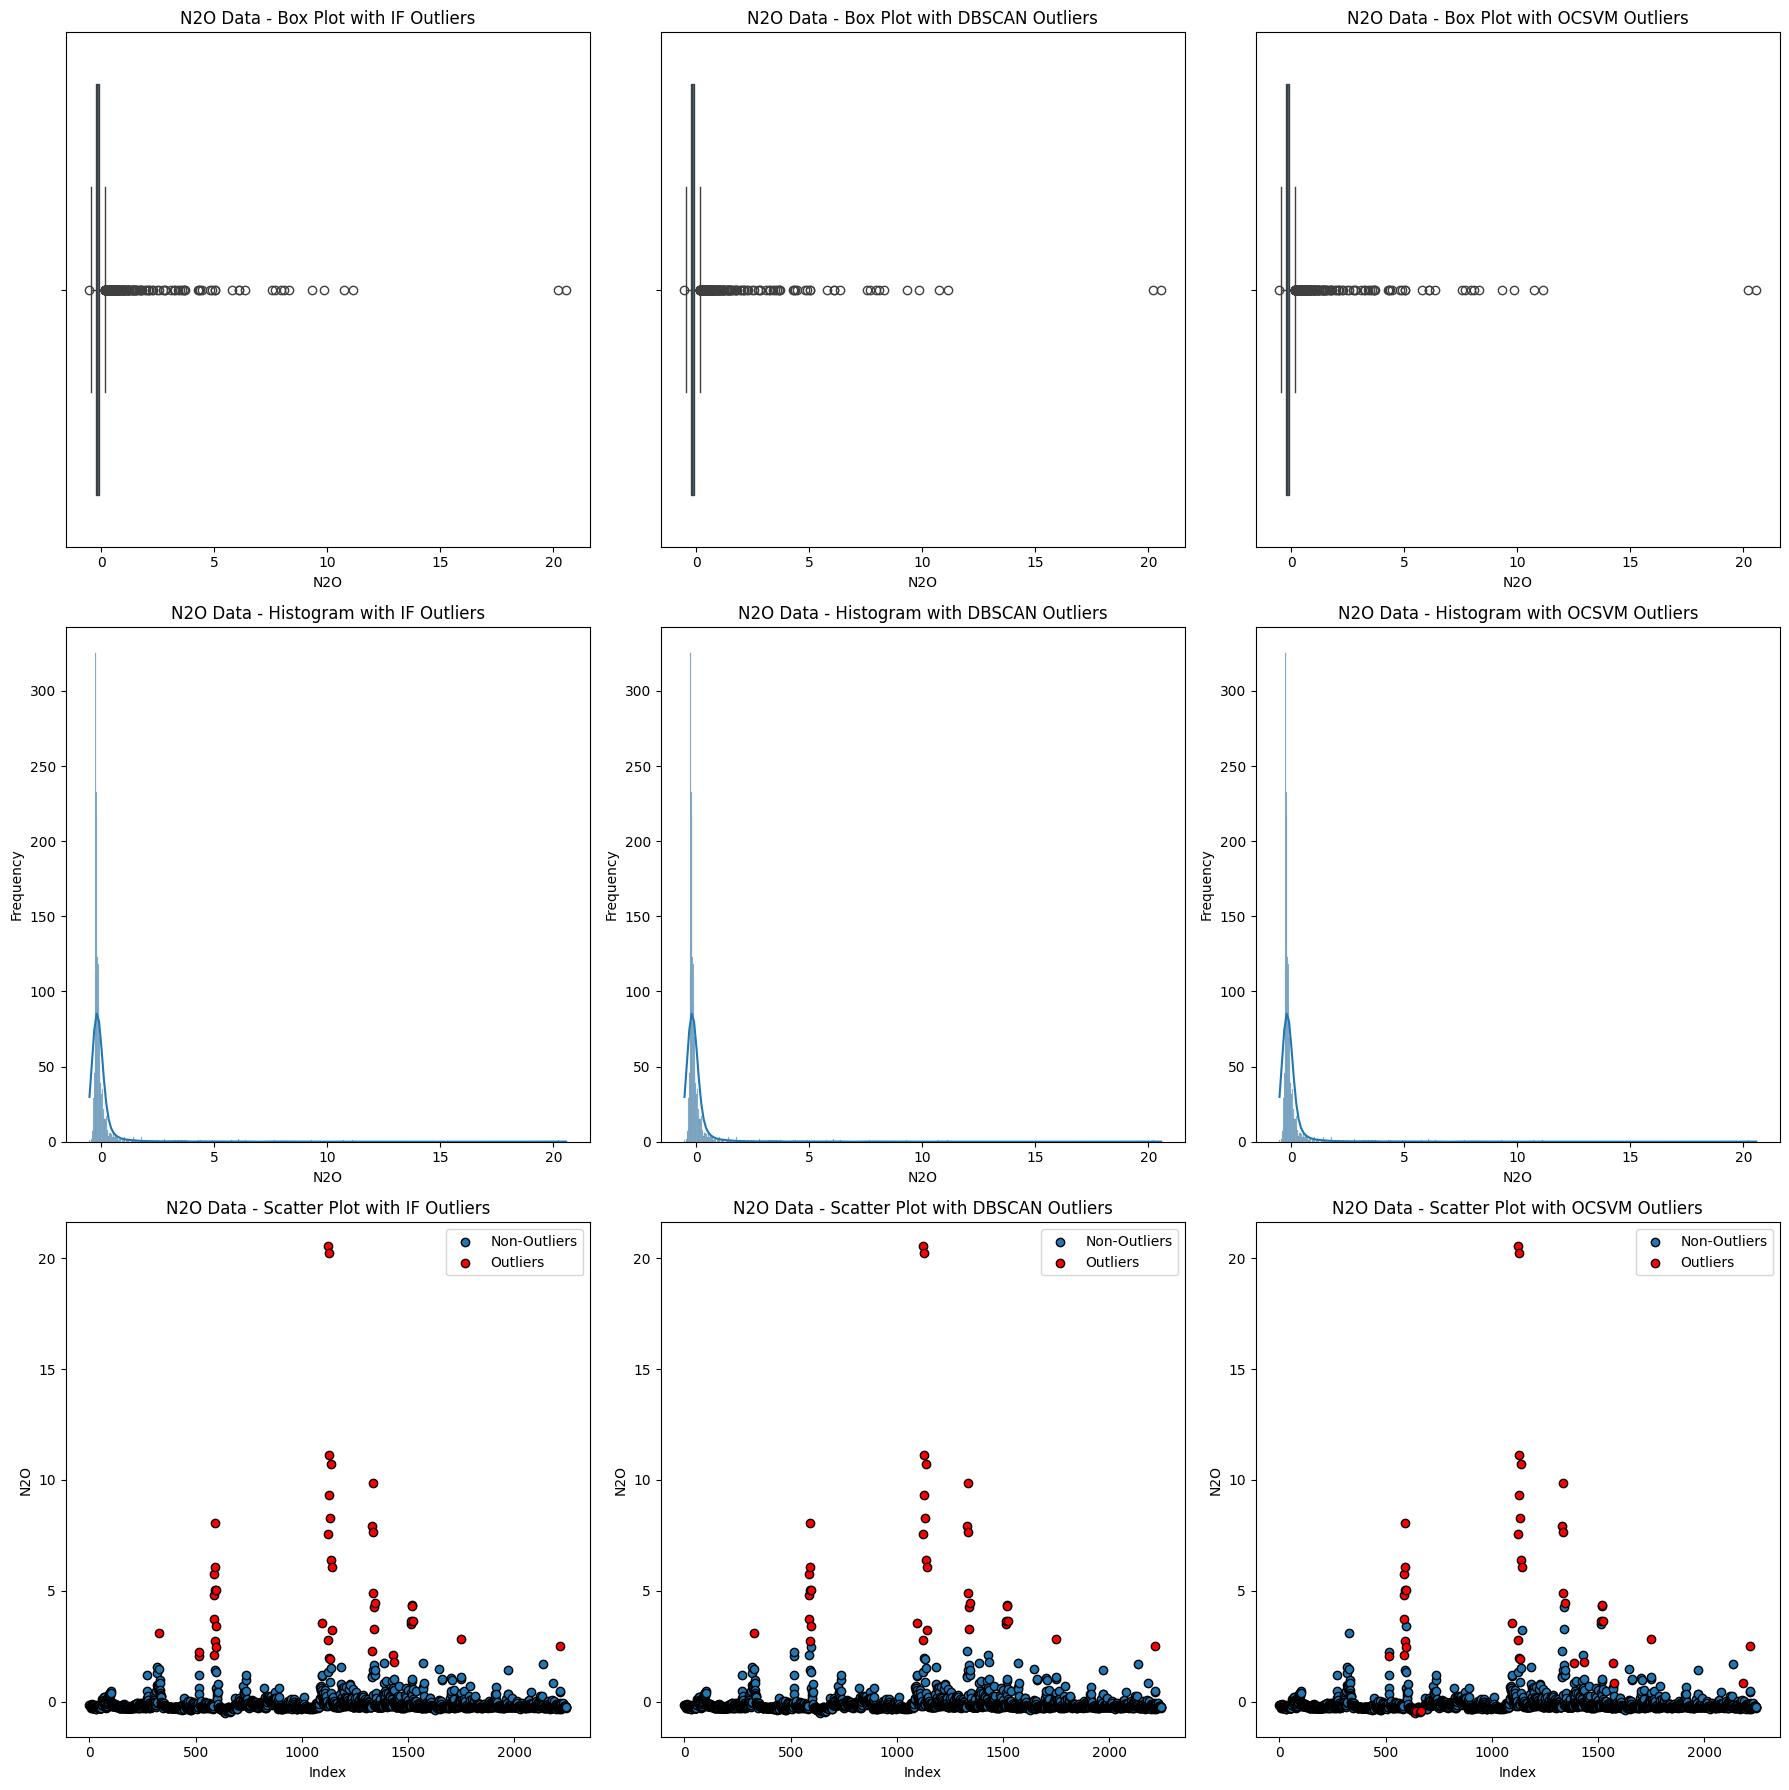

In [99]:

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Box Plot - N2O Data with IF Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IF Outliers')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with DBSCAN Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with DBSCAN Outliers')
axs[0, 1].set_xlabel('N2O')

# Box Plot - N2O Data with OCSVM Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('N2O Data - Box Plot with OCSVM Outliers')
axs[0, 2].set_xlabel('N2O')

# Histogram - N2O Data with IF Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IF Outliers')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with DBSCAN Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with DBSCAN Outliers')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IF Outliers
axs[2, 0].scatter(non_outliers_if.index, non_outliers_if['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 0].scatter(outliers_if.index, outliers_if['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IF Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')
axs[2, 0].legend()

# Scatter Plot - N2O Data with DBSCAN Outliers
axs[2, 1].scatter(non_outliers_dbscan.index, non_outliers_dbscan['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 1].scatter(outliers_dbscan.index, outliers_dbscan['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with DBSCAN Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')
axs[2, 1].legend()

# Scatter Plot - N2O Data with OCSVM Outliers
axs[2, 2].scatter(non_outliers_ocsvm.index, non_outliers_ocsvm['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 2].scatter(outliers_ocsvm.index, outliers_ocsvm['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 2].set_title('N2O Data - Scatter Plot with OCSVM Outliers')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')
axs[2, 2].legend()

# Adjust layout
plt.tight_layout()
plt.savefig('Visual/BeforeRemoveOutliers/002_1_N2O_OCSVM_Outlier_Detection.png')
plt.show()

In [100]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Label'] = ['outlier' if x == -1 else 'not outlier' for x in iso_pred]
data['DBSCAN_Label'] = ['outlier' if x == -1 else 'not outlier' for x in dbscan_pred]
data['OCSVM_Label'] = ['outlier' if x == -1 else 'not outlier' for x in ocsvm_pred]

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [
        data[data['IF_Label'] == 'outlier'].shape[0],
        data[data['DBSCAN_Label'] == 'outlier'].shape[0],
        data[data['OCSVM_Label'] == 'outlier'].shape[0]
    ]
})

# Add the prediction results to the dataset
data['IF_Outlier'] = iso_pred
data['DBSCAN_Outlier'] = dbscan_pred
data['OCSVM_Outlier'] = ocsvm_pred

# Calculate the number of outliers for each method
outlier_counts = {
    'Isolation Forest': (data['IF_Outlier'] == -1).sum(),
    'DBSCAN': (data['DBSCAN_Outlier'] == -1).sum(),
    'One-Class SVM': (data['OCSVM_Outlier'] == -1).sum()
}
# Save the updated dataset to a new CSV file
updated_file_path = 'hasil/06.standard_scaler_agriculture_dataset_with_outliers.csv'
data.to_csv(updated_file_path, index=False)

In [101]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.083017,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.082259,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.071667,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.069647,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.031903,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.774893,-0.076581,0.132085,-0.084319,1,0,1,not outlier,not outlier,not outlier
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.789985,0.352933,0.126198,-0.357662,1,0,1,not outlier,not outlier,not outlier
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.716945,0.613785,-0.135877,-0.631005,1,0,1,not outlier,not outlier,not outlier
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.668688,0.445122,-0.199876,-0.069133,1,0,1,not outlier,not outlier,not outlier


In [102]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Outlier'] = ['outlier' if pred == -1 else 'not outlier' for pred in iso_pred]

# Save the updated dataset to a new CSV file
updated_file_path = 'hasil/07.standard_scaler_agriculture_dataset_with_outliers.csv'
data.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataset
print(data.head())

      Date      Year Experiment   DataUse Replication     Month Vegetation  \
0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O    N_rate  ...       NO3      Clay      Sand       SOM  \
0  Annual -0.125408  0.481233  ... -0.083017 -0.904182  0.796768 -0.642242   
1  Annual -0.185324  0.481233  ... -0.082259 -0.904182  0.796768 -0.642242   
2  Annual -0.137842  0.481233  ... -0.071667 -0.904182  0.796768 -0.642242   
3  Annual -0.144855  0.481233  ... -0.069647 -0.904182  0.796768 -0.642242   
4  Annual -0.158726  0.481233  ... -0.031903 -0.904182  0.796768 -0.642242   

    IF_Outlier  DBSCAN_Outlier  OCSVM_Outlier     IF_Label  DB

In [103]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]
# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)
data['IF_Outlier'] = iso_pred

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)
data['DBSCAN_Outlier'] = dbscan_pred

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)
data['OCSVM_Outlier'] = ocsvm_pred


In [104]:

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum()
    ]
})

In [105]:
# Save the summary table to a CSV file
summary_file_path = 'hasil/BeforeRemoveOutliers/008_N2O_outlier_comparison_summary.csv'
summary_table.to_csv(summary_file_path, index=False)
summary_table

,Method,Outlier Count,Inlier Count
0,Isolation Forest,113,2133
1,DBSCAN,37,2209
2,One-Class SVM,112,2134


In [106]:
# Save the updated dataset with outlier labels
updated_file_path = 'hasil/009_N2O_standard_scaler_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.083017,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.082259,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.071667,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.069647,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.031903,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier


             Method  Outlier Count  Inlier Count
0  Isolation Forest            113          2133
1            DBSCAN             37          2209
2     One-Class SVM            112          2134


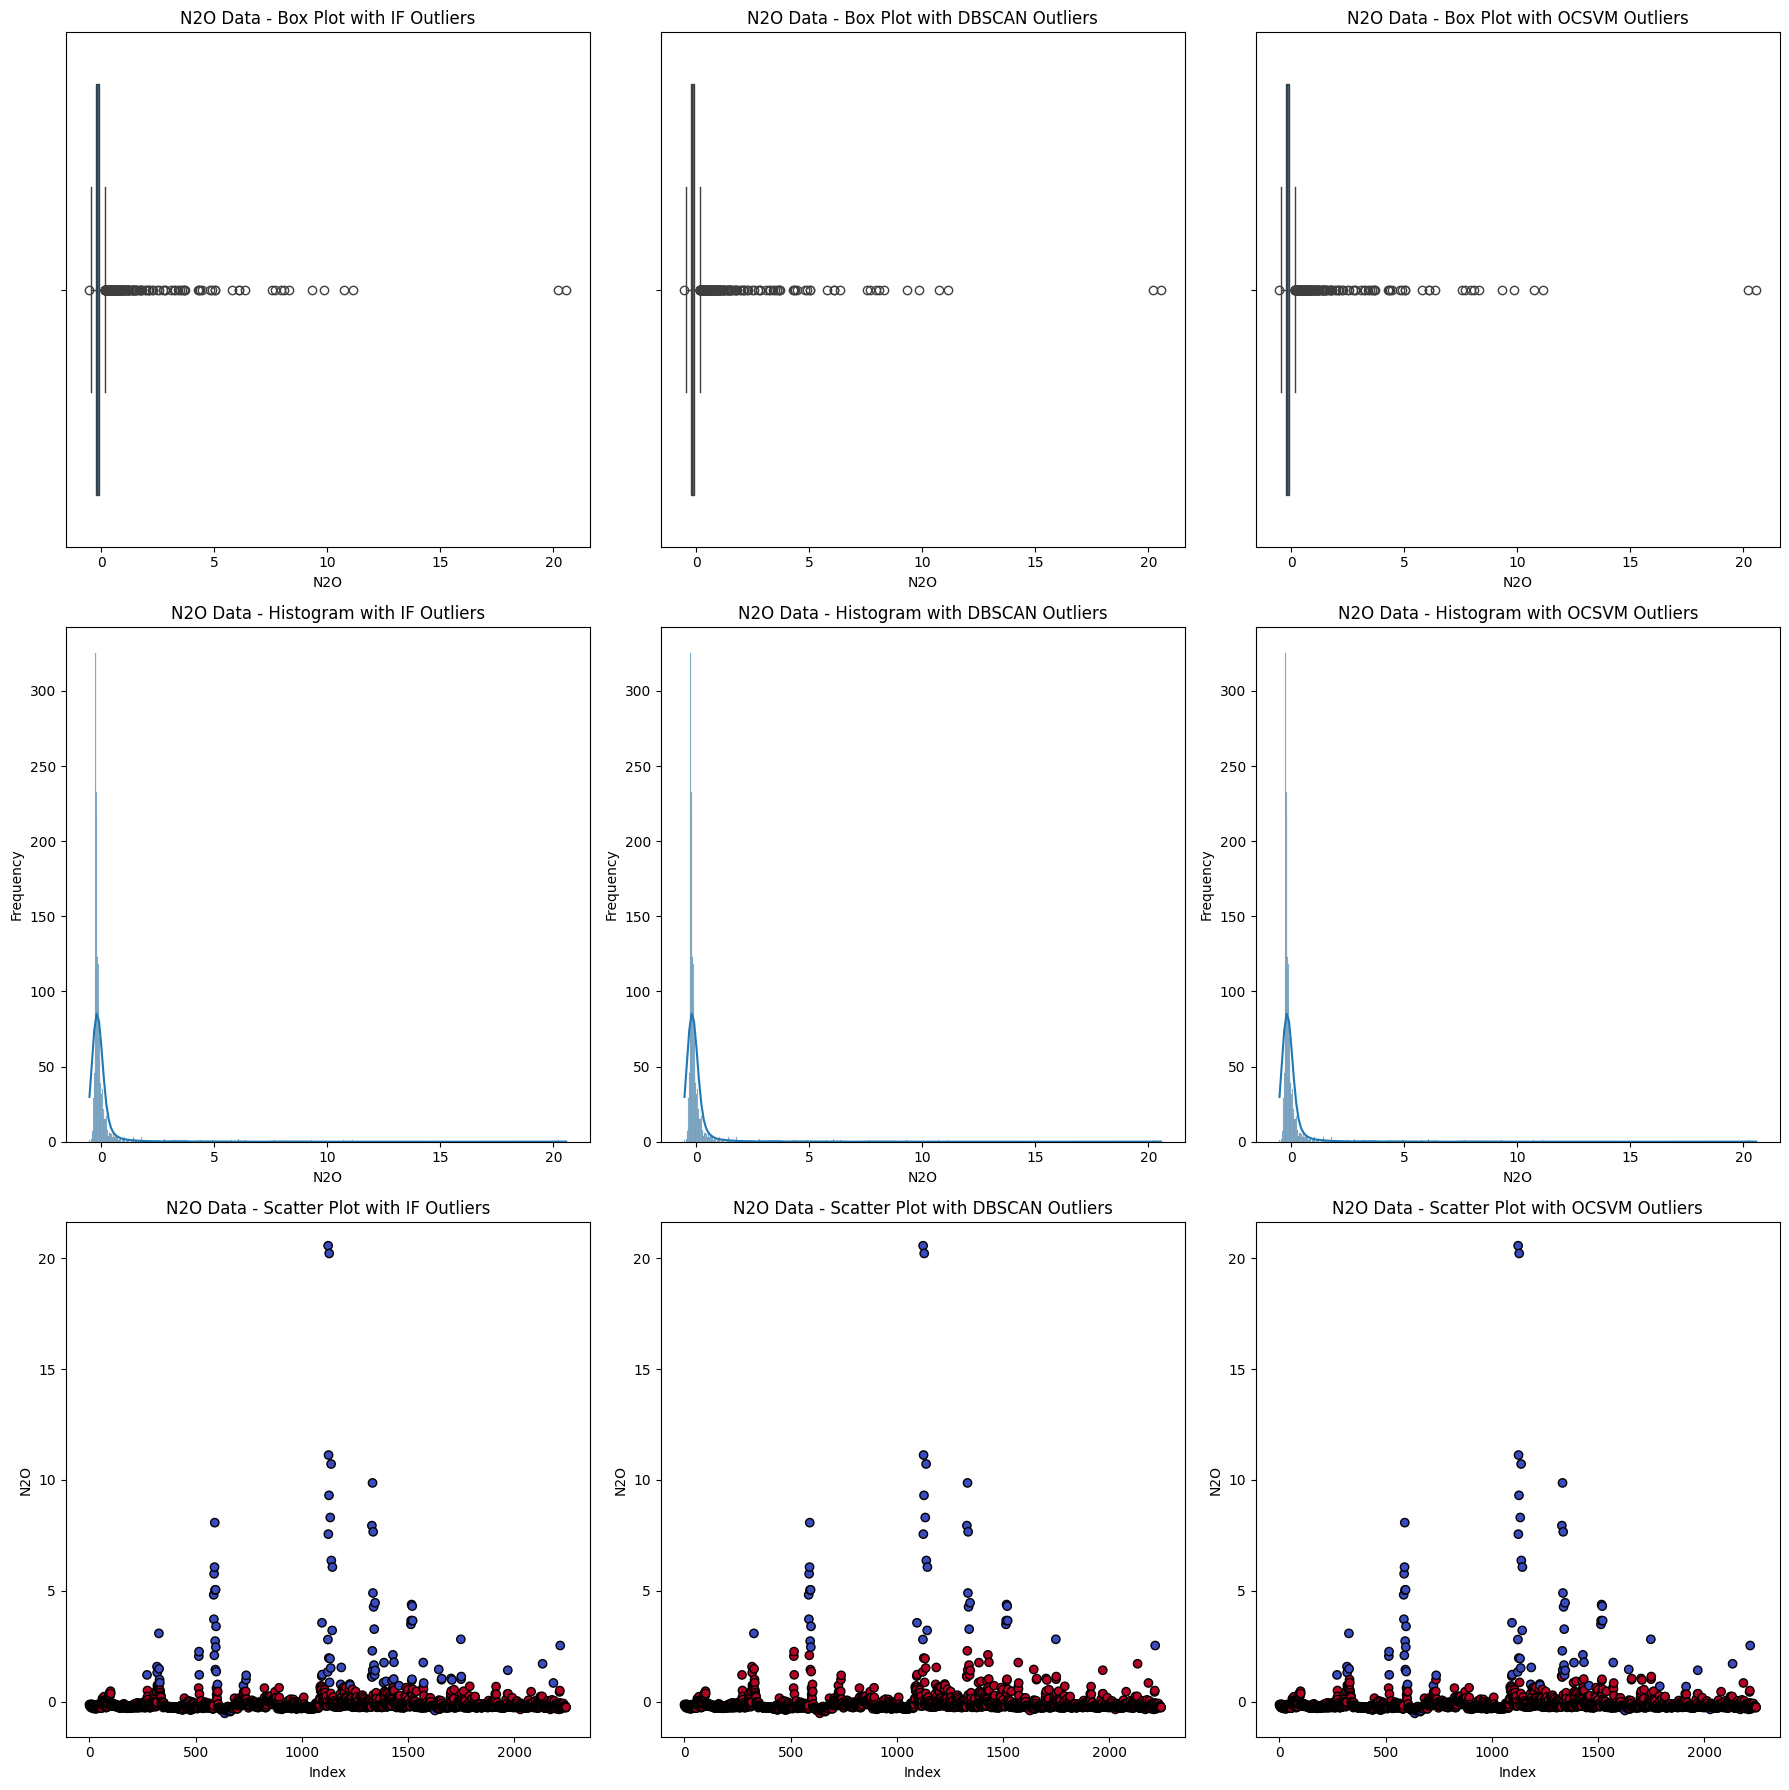

In [107]:
# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Box Plot - N2O Data with IF Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IF Outliers')
axs[0, 0].set_xlabel('N2O')
plt.savefig('visual/003_1_N2O_BoxPlot_IF_Outliers.png')  # Save the figure

# Box Plot - N2O Data with DBSCAN Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with DBSCAN Outliers')
axs[0, 1].set_xlabel('N2O')
plt.savefig('visual/003_2_N2O_BoxPlot_DBSCAN_Outliers.png')  # Save the figure

# Box Plot - N2O Data with OCSVM Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('N2O Data - Box Plot with OCSVM Outliers')
axs[0, 2].set_xlabel('N2O')
plt.savefig('visual/003_3_N2O_BoxPlot_OCSVM_Outliers.png')  # Save the figure

# Histogram - N2O Data with IF Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IF Outliers')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')
plt.savefig('visual/003_4_N2O_Histogram_IF_Outliers.png')  # Save the figure

# Histogram - N2O Data with DBSCAN Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with DBSCAN Outliers')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')
plt.savefig('visual/003_5_N2O_Histogram_DBSCAN_Outliers.png')  # Save the figure

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')
plt.savefig('visual/003_6_N2O_Histogram_OCSVM_Outliers.png')  # Save the figure

# Scatter Plot - N2O Data with IF Outliers
axs[2, 0].scatter(data.index, data['N2O'], c=data['IF_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IF Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')
plt.savefig('visual/003_7_N2O_ScatterPlot_IF_Outliers.png')  # Save the figure

# Scatter Plot - N2O Data with DBSCAN Outliers
axs[2, 1].scatter(data.index, data['N2O'], c=data['DBSCAN_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with DBSCAN Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')
plt.savefig('visual/003_8_N2O_ScatterPlot_DBSCAN_Outliers.png')  # Save the figure

# Scatter Plot - N2O Data with OCSVM Outliers
axs[2, 2].scatter(data.index, data['N2O'], c=data['OCSVM_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 2].set_title('N2O Data - Scatter Plot with OCSVM Outliers')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')
plt.savefig('visual/003_9_N2O_ScatterPlot_OCSVM_Outliers.png')  # Save the figure

# Adjust layout
plt.tight_layout()
plt.show()

# Evaluation of Model Performance (Accuracy, Precision, Recall, F1-Score):

In [108]:
# Contoh deteksi outliers dengan IQR (Interquartile Range)
Q1 = data['N2O'].quantile(0.25)
Q3 = data['N2O'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Definisikan GroundTruth berdasarkan IQR
data['GroundTruth'] = np.where((data['N2O'] < lower_bound) | (data['N2O'] > upper_bound), -1, 1)

# Sekarang Anda bisa menggunakan kolom 'GroundTruth' sebagai label (y)
X = data[['N2O', 'N_rate', 'AirT', 'WFPS25cm', 'NO3', 'NH4', 'Clay', 'Sand']]  # Fitur yang digunakan
y = data['GroundTruth']  # Gunakan GroundTruth sebagai label


In [109]:
groundth = 'hasil/010_N2O_groundtruth_dataset.csv'
data.to_csv(groundth, index=False)
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label,GroundTruth
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1


## Split Dataset

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Contoh data: X adalah fitur, y adalah label
X = data[['N2O', 'N_rate', 'AirT', 'WFPS25cm', 'NO3', 'NH4', 'Clay', 'Sand']]  # Pilih fitur yang ingin digunakan
y = data['GroundTruth']  # GroundTruth sebagai label (-1 untuk outlier, 1 untuk inlier)

# Daftar ukuran test size yang ingin diuji
test_sizes = [0.2, 0.25, 0.3, 0.35]

# List untuk menyimpan hasil shape data dan jumlah data
shape_results = []

# Iterasi untuk setiap test size
for tsize in test_sizes:
    # Split data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=42)
    
    # Simpan hasil shape dan jumlah data ke dalam list
    shape_results.append({
        'Test_Size': tsize,
        'X_train_shape': X_train.shape,
        'y_train_shape': y_train.shape,
        'X_test_shape': X_test.shape,
        'y_test_shape': y_test.shape,
        'X_train_count': X_train.shape[0],  # Jumlah data di X_train
        'X_test_count': X_test.shape[0],    # Jumlah data di X_test
        'y_train_count': y_train.shape[0],  # Jumlah data di y_train
        'y_test_count': y_test.shape[0]     # Jumlah data di y_test
    })

# Convert hasil shape dan jumlah data menjadi DataFrame
shape_df = pd.DataFrame(shape_results)

# Simpan DataFrame ke CSV
shape_df.to_csv('hasil/010_2_data_shapes_and_counts_by_test_size.csv', index=False)

print("Shapes and counts of data with different test sizes have been saved to 'data_shapes_and_counts_by_test_size.csv'")


Shapes and counts of data with different test sizes have been saved to 'data_shapes_and_counts_by_test_size.csv'


In [111]:
# Normal Dataset Split
# Contoh data: X adalah fitur, y adalah label
# X = data[['N2O', 'N_rate', 'AirT', 'WFPS25cm', 'NO3', 'NH4', 'Clay', 'Sand']]  # Pilih fitur yang ingin digunakan
# y = data['GroundTruth']  # GroundTruth sebagai label (-1 untuk outlier, 1 untuk inlier)

# tsize=0.3
# # Split data menjadi train dan test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Verifikasi data
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)


In [112]:
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label,GroundTruth
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.904182,0.796768,-0.642242,1,0,1,not outlier,not outlier,not outlier,1


In [113]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import IsolationForest
# from sklearn.cluster import DBSCAN
# from sklearn.svm import OneClassSVM
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Contoh data: X adalah fitur, y adalah label
X = data[['N2O', 'N_rate', 'AirT', 'WFPS25cm', 'NO3', 'NH4', 'Clay', 'Sand']]  # Pilih fitur yang ingin digunakan
y = data['GroundTruth']  # GroundTruth sebagai label (-1 untuk outlier, 1 untuk inlier)

# Daftar ukuran test size yang ingin diuji
test_sizes = [0.2, 0.25, 0.3, 0.35]

# List untuk menyimpan hasil evaluasi
evaluation_results = []

# Iterasi untuk setiap test size
for tsize in test_sizes:
    # Split data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=42)
    
    # Train and predict using Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    iso_forest.fit(X_train)
    y_pred_if = iso_forest.predict(X_test)

    # Train and predict using DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    y_pred_db = dbscan.fit_predict(X_test)

    # Train and predict using One-Class SVM
    ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
    y_pred_svm = ocsvm.fit_predict(X_test)

    # Convert DBSCAN predictions to binary (outliers = -1, inliers = 1)
    y_pred_db_binary = np.where(y_pred_db == -1, -1, 1)

    # Performance Evaluation for Individual Models
    # Evaluate Isolation Forest
    accuracy_if = accuracy_score(y_test, y_pred_if)
    precision_if = precision_score(y_test, y_pred_if, pos_label=-1, zero_division=0)
    recall_if = recall_score(y_test, y_pred_if, pos_label=-1, zero_division=0)
    f1_if = f1_score(y_test, y_pred_if, pos_label=-1, zero_division=0)

    # Evaluate DBSCAN (using binary labels)
    accuracy_db = accuracy_score(y_test, y_pred_db_binary)
    precision_db = precision_score(y_test, y_pred_db_binary, pos_label=-1, zero_division=0)
    recall_db = recall_score(y_test, y_pred_db_binary, pos_label=-1, zero_division=0)
    f1_db = f1_score(y_test, y_pred_db_binary, pos_label=-1, zero_division=0)

    # Evaluate One-Class SVM
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    precision_svm = precision_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)
    recall_svm = recall_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)
    f1_svm = f1_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)

    # Simpan hasil evaluasi ke dalam list
    evaluation_results.append({
        'Test_Size': tsize,
        'Model': 'Isolation Forest',
        'Accuracy': accuracy_if,
        'Precision': precision_if,
        'Recall': recall_if,
        'F1-Score': f1_if
    })

    evaluation_results.append({
        'Test_Size': tsize,
        'Model': 'DBSCAN',
        'Accuracy': accuracy_db,
        'Precision': precision_db,
        'Recall': recall_db,
        'F1-Score': f1_db
    })

    evaluation_results.append({
        'Test_Size': tsize,
        'Model': 'One-Class SVM',
        'Accuracy': accuracy_svm,
        'Precision': precision_svm,
        'Recall': recall_svm,
        'F1-Score': f1_svm
    })

# Convert hasil evaluasi menjadi DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Simpan DataFrame ke CSV
evaluation_df.to_csv('hasil/011_1_model_evaluation_by_test_size.csv', index=False)

print("Evaluation metrics for different test sizes have been saved to 'model_evaluation_by_test_size.csv'")


Evaluation metrics for different test sizes have been saved to 'model_evaluation_by_test_size.csv'


In [114]:
# Import necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train and predict using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train)
y_pred_if = iso_forest.predict(X_test)

# Train and predict using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_db = dbscan.fit_predict(X_test)

# Train and predict using One-Class SVM
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
y_pred_svm = ocsvm.fit_predict(X_test)

# Convert DBSCAN predictions to binary (outliers = -1, inliers = 1)
y_pred_db_binary = np.where(y_pred_db == -1, -1, 1)

# Performance Evaluation for Individual Models

# Evaluate Isolation Forest
accuracy_if = accuracy_score(y_test, y_pred_if)
precision_if = precision_score(y_test, y_pred_if, pos_label=-1)
recall_if = recall_score(y_test, y_pred_if, pos_label=-1)
f1_if = f1_score(y_test, y_pred_if, pos_label=-1)

# Evaluate DBSCAN (using binary labels)
accuracy_db = accuracy_score(y_test, y_pred_db_binary)
precision_db = precision_score(y_test, y_pred_db_binary, pos_label=-1)
recall_db = recall_score(y_test, y_pred_db_binary, pos_label=-1)
f1_db = f1_score(y_test, y_pred_db_binary, pos_label=-1)

# Evaluate One-Class SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=-1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=-1)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=-1)

# Display performance metrics for each model
print("Performance Metrics for Individual Models:")
print(f"Isolation Forest - Accuracy: {accuracy_if:.2f}, Precision: {precision_if:.2f}, Recall: {recall_if:.2f}, F1-Score: {f1_if:.2f}")
print(f"DBSCAN           - Accuracy: {accuracy_db:.2f}, Precision: {precision_db:.2f}, Recall: {recall_db:.2f}, F1-Score: {f1_db:.2f}")
print(f"One-Class SVM    - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}, F1-Score: {f1_svm:.2f}")



Performance Metrics for Individual Models:
Isolation Forest - Accuracy: 0.90, Precision: 0.57, Recall: 0.23, F1-Score: 0.33
DBSCAN           - Accuracy: 0.57, Precision: 0.18, Recall: 0.88, F1-Score: 0.29
One-Class SVM    - Accuracy: 0.89, Precision: 0.41, Recall: 0.20, F1-Score: 0.27


In [115]:
# Create a dictionary with performance metrics for each model
performance_metrics = {
    'Model': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Accuracy': [accuracy_if, accuracy_db, accuracy_svm],
    'Precision': [precision_if, precision_db, precision_svm],
    'Recall': [recall_if, recall_db, recall_svm],
    'F1-Score': [f1_if, f1_db, f1_svm]
}

# Convert the dictionary into a pandas DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Save the DataFrame to a CSV file
performance_df.to_csv('hasil/012_0_model_performance_metrics.csv', index=False)


In [116]:
# Collect performance metrics into a dictionary
performance_metrics = {
    'Model': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Accuracy': [accuracy_if, accuracy_db, accuracy_svm],
    'Precision': [precision_if, precision_db, precision_svm],
    'Recall': [recall_if, recall_db, recall_svm],
    'F1-Score': [f1_if, f1_db, f1_svm]
}

# Convert the dictionary into a DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Display the DataFrame
print(performance_df)

# Save the DataFrame to a CSV file
performance_df.to_csv('hasil/011_2_model_performance_metrics_afterOutlier_split30pecent.csv', index=False)

print("Performance metrics have been saved to 'model_performance_metrics.csv'")

              Model  Accuracy  Precision    Recall  F1-Score
0  Isolation Forest  0.903561   0.571429  0.231884  0.329897
1            DBSCAN  0.566766   0.176812  0.884058  0.294686
2     One-Class SVM  0.888724   0.411765  0.202899  0.271845
Performance metrics have been saved to 'model_performance_metrics.csv'


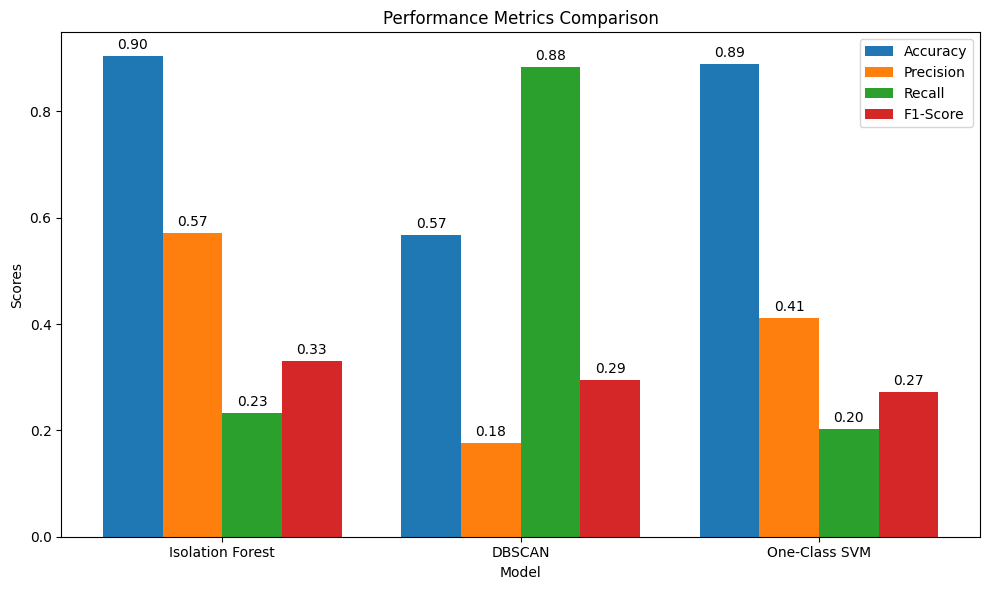

In [117]:
# Convert the dictionary into a pandas DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Plotting the performance comparison
labels = performance_df['Model']
accuracy = performance_df['Accuracy']
precision = performance_df['Precision']
recall = performance_df['Recall']
f1_score = performance_df['F1-Score']

# Create a grouped bar chart
x = np.arange(len(labels))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add labels for each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to each set of bars
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

# Adjust layout
fig.tight_layout()

# Save the figure as PNG file
plt.savefig('visual/009_1_model_performance_comparison.png')

# Show the plot
plt.show()

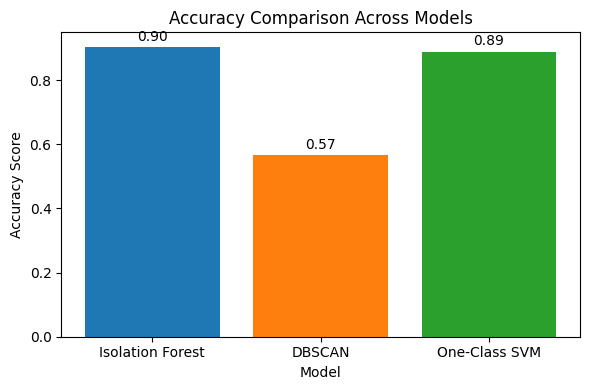

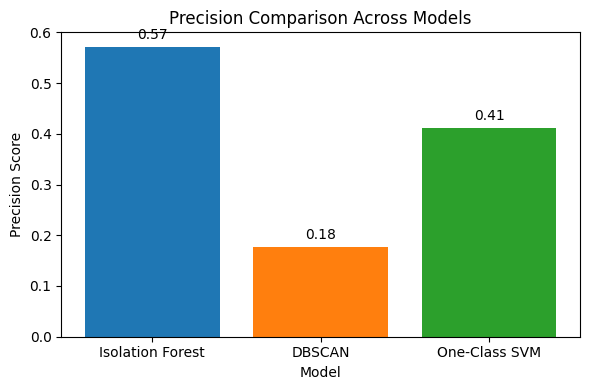

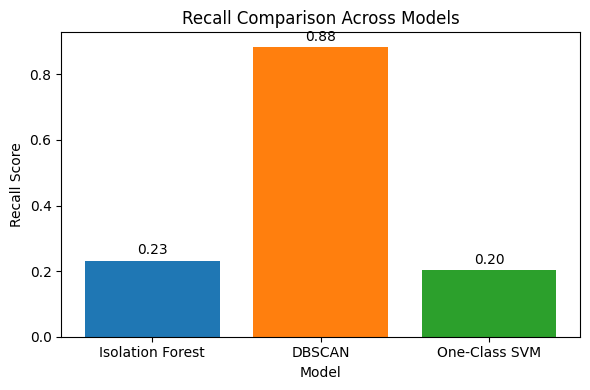

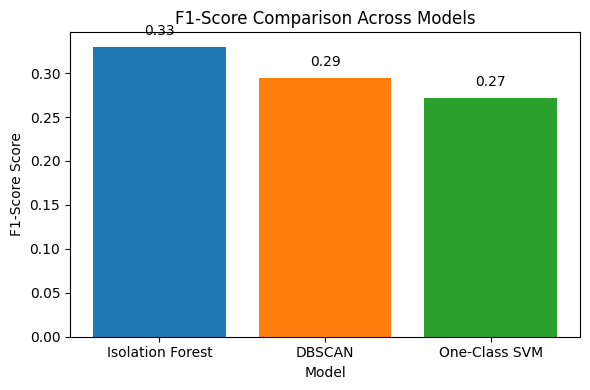

In [118]:
# Convert the dictionary into a pandas DataFrame
# performance_df = pd.DataFrame(performance_metrics)

# Plotting the performance comparison for each metric
labels = performance_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_data = [performance_df['Accuracy'], performance_df['Precision'], performance_df['Recall'], performance_df['F1-Score']]

# Define different colors for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
# Loop through each metric and create a separate bar chart
for i, metric in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(6, 4))

    # Create a bar chart for each metric
    # ax.bar(labels, metric_data[i], color='skyblue')
    ax.bar(labels, metric_data[i], color=colors)

    # Add labels and title
    ax.set_xlabel('Model')
    ax.set_ylabel(f'{metric} Score')
    ax.set_title(f'{metric} Comparison Across Models')
    # Display the legend (Model names)
    # Annotate each bar with the corresponding value
    for j, v in enumerate(metric_data[i]):
        ax.text(j, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

    # Adjust layout and save each plot
    plt.tight_layout()
    plt.savefig(f'visual/009_1_performance_metric_{metric}_comparison.png')

    # Show the plot
    plt.show()


In [119]:
# # Import necessary metrics from sklearn
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Performance Evaluation for Individual Models

# # Evaluate Isolation Forest
# accuracy_if = accuracy_score(y_test, y_pred_if)
# precision_if = precision_score(y_test, y_pred_if)
# recall_if = recall_score(y_test, y_pred_if)
# f1_if = f1_score(y_test, y_pred_if)

# # Evaluate DBSCAN
# accuracy_db = accuracy_score(y_test, y_pred_db)
# precision_db = precision_score(y_test, y_pred_db)
# recall_db = recall_score(y_test, y_pred_db)
# f1_db = f1_score(y_test, y_pred_db)

# # Evaluate One-Class SVM
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# precision_svm = precision_score(y_test, y_pred_svm)
# recall_svm = recall_score(y_test, y_pred_svm)
# f1_svm = f1_score(y_test, y_pred_svm)

# # Display performance metrics for each model
# print("Performance Metrics for Individual Models:")
# print(f"Isolation Forest - Accuracy: {accuracy_if:.2f}, Precision: {precision_if:.2f}, Recall: {recall_if:.2f}, F1-Score: {f1_if:.2f}")
# print(f"DBSCAN           - Accuracy: {accuracy_db:.2f}, Precision: {precision_db:.2f}, Recall: {recall_db:.2f}, F1-Score: {f1_db:.2f}")
# print(f"One-Class SVM    - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}, F1-Score: {f1_svm:.2f}")

# Modified Weighted

In [120]:
# # import pandas as pd
# # import numpy as np
# # from sklearn.model_selection import train_test_split
# # from sklearn.ensemble import IsolationForest
# # from sklearn.cluster import DBSCAN
# # from sklearn.svm import OneClassSVM
# # from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
# # Redirect print output to a text file
# import sys
# with open('hasil/output_log.txt', 'w') as f:
#     sys.stdout = f  # Redirect print output to file
#     # Contoh data: X adalah fitur, y adalah label
#     X = data[['N2O', 'N_rate', 'AirT', 'WFPS25cm', 'NO3', 'NH4', 'Clay', 'Sand']]  # Pilih fitur yang ingin digunakan
#     y = data['GroundTruth']  # GroundTruth sebagai label (-1 untuk outlier, 1 untuk inlier)

#     # Daftar ukuran test size yang ingin diuji
#     test_sizes = [0.2, 0.25, 0.3, 0.35]

#     # List untuk menyimpan hasil evaluasi
#     evaluation_results = []
#     # List untuk menyimpan bobot untuk setiap test size
#     weights_results = []

#     # Iterasi untuk setiap test size
#     for tsize in test_sizes:
#         # Split data menjadi train dan test
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=42)
        
#         # Train and predict using Isolation Forest
#         iso_forest = IsolationForest(contamination=0.05, random_state=42)
#         iso_forest.fit(X_train)
#         y_pred_if = iso_forest.predict(X_test)

#         # Train and predict using DBSCAN
#         dbscan = DBSCAN(eps=0.5, min_samples=5)
#         y_pred_db = dbscan.fit_predict(X_test)

#         # Train and predict using One-Class SVM
#         ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
#         y_pred_svm = ocsvm.fit_predict(X_test)

#         # Convert DBSCAN predictions to binary (outliers = -1, inliers = 1)
#         y_pred_db_binary = np.where(y_pred_db == -1, -1, 1)

#         # Performance Evaluation for Individual Models
#         # Evaluate Isolation Forest
#         accuracy_if = accuracy_score(y_test, y_pred_if)
#         precision_if = precision_score(y_test, y_pred_if, pos_label=-1, zero_division=0)
#         recall_if = recall_score(y_test, y_pred_if, pos_label=-1, zero_division=0)
#         f1_if = f1_score(y_test, y_pred_if, pos_label=-1, zero_division=0)

#         # Evaluate DBSCAN (using binary labels)
#         accuracy_db = accuracy_score(y_test, y_pred_db_binary)
#         precision_db = precision_score(y_test, y_pred_db_binary, pos_label=-1, zero_division=0)
#         recall_db = recall_score(y_test, y_pred_db_binary, pos_label=-1, zero_division=0)
#         f1_db = f1_score(y_test, y_pred_db_binary, pos_label=-1, zero_division=0)

#         # Evaluate One-Class SVM
#         accuracy_svm = accuracy_score(y_test, y_pred_svm)
#         precision_svm = precision_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)
#         recall_svm = recall_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)
#         f1_svm = f1_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)

#         # Calculate Weights Based on Accuracy
#         total_accuracy = accuracy_if + accuracy_db + accuracy_svm
#         weight_if = accuracy_if / total_accuracy
#         weight_db = accuracy_db / total_accuracy
#         weight_svm = accuracy_svm / total_accuracy

#         # Simpan hasil bobot ke dalam list
#         weights_results.append({
#             'Test_Size': tsize,
#             'Weight_IF': weight_if,
#             'Weight_DBSCAN': weight_db,
#             'Weight_OCSVM': weight_svm
#         })
#         print(f"Weights for test size {tsize}: IF = {weight_if:.2f}, DBSCAN = {weight_db:.2f}, OCSVM = {weight_svm:.2f}")
#         print(f"Weights Assigned for test size {tsize}: Isolation Forest = {weight_if:.2f}, DBSCAN = {weight_db:.2f}, One-Class SVM = {weight_svm:.2f}")

#         # Apply Weighted Voting
#         weighted_vote = (weight_if * y_pred_if) + (weight_db * y_pred_db_binary) + (weight_svm * y_pred_svm)

#         # Convert weighted vote to final prediction (-1 = outlier, 1 = inlier)
#         ensemble_pred_weighted = np.where(weighted_vote >= 0.5, 1, -1)

#         # Performance Evaluation for Weighted Ensemble
#         print(f"\nClassification Report for Weighted Ensemble (test size {tsize}):")
#         print(classification_report(y_test, ensemble_pred_weighted, zero_division=0))  # Use zero_division to avoid warnings

#         # Additional Metrics for Weighted Ensemble
#         auc_score_weighted = roc_auc_score(y_test, ensemble_pred_weighted)
#         accuracy_weighted = accuracy_score(y_test, ensemble_pred_weighted)
#         precision_weighted = precision_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)
#         recall_weighted = recall_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)
#         f1_weighted = f1_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)

#         # Simpan hasil evaluasi ke dalam list
#         evaluation_results.append({
#             'Test_Size': tsize,
#             'Model': 'Weighted Ensemble',
#             'AUC Score': auc_score_weighted,
#             'Accuracy': accuracy_weighted,
#             'Precision': precision_weighted,
#             'Recall': recall_weighted,
#             'F1-Score': f1_weighted
#         })

#     # Convert hasil evaluasi menjadi DataFrame
#     evaluation_df = pd.DataFrame(evaluation_results)

#     # Simpan DataFrame ke CSV
#     evaluation_df.to_csv('hasil/012_1_weighted_ensemble_evaluation_by_test_size.csv', index=False)

#     print("Evaluation metrics for Weighted Ensemble with different test sizes have been saved to 'weighted_ensemble_evaluation_by_test_size.csv'")

#     # Convert hasil bobot menjadi DataFrame
#     weights_df = pd.DataFrame(weights_results)

#     # Simpan DataFrame ke CSV
#     weights_df.to_csv('hasil/012_00_model_weights_by_test_size.csv', index=False)

#     print("Weights for different test sizes have been saved to 'model_weights_by_test_size.csv'")
# # Restore the default output stream
# sys.stdout = sys.__stdout__

# Weighted Voting Based on Performance

In [121]:
# Import the necessary metric
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Calculate Weights Based on Performance (using accuracy in this case)
total_accuracy = accuracy_if + accuracy_db + accuracy_svm

# Normalize the weights so that their sum equals 1
weight_if = accuracy_if / total_accuracy
weight_db = accuracy_db / total_accuracy
weight_svm = accuracy_svm / total_accuracy

print(f"Weights Assigned: Isolation Forest = {weight_if:.2f}, DBSCAN = {weight_db:.2f}, One-Class SVM = {weight_svm:.2f}")

# Apply Weighted Voting
weighted_vote = (weight_if * y_pred_if) + (weight_db * y_pred_db) + (weight_svm * y_pred_svm)

# Convert weighted vote to final prediction (-1 = outlier, 1 = inlier)
ensemble_pred_weighted = np.where(weighted_vote >= 0.5, 1, -1)

# Performance Evaluation for Weighted Ensemble
print("\nClassification Report for Weighted Ensemble:")
print(classification_report(y_test, ensemble_pred_weighted, zero_division=0))  # Use zero_division to avoid warnings

# Additional Metrics
auc_score_weighted = roc_auc_score(y_test, ensemble_pred_weighted)
accuracy_weighted = accuracy_score(y_test, ensemble_pred_weighted)
precision_weighted = precision_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)
recall_weighted = recall_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)
f1_weighted = f1_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)

# Display the results
print(f"AUC Score for Weighted Ensemble: {auc_score_weighted:.5f}")
print(f"Accuracy for Weighted Ensemble: {accuracy_weighted:.5f}")
print(f"Precision: {precision_weighted:.5f}, Recall: {recall_weighted:.5f}, F1-Score: {f1_weighted:.5f}")

# Display the metrics
auc_score = f"{auc_score_weighted:.5f}"
error_rate = f"{1 - accuracy_weighted:.5f}"
precision = f"{precision_weighted:.5f}"
recall = f"{recall_weighted:.5f}"
f1_score_result = f"{f1_weighted:.5f}"
accuracy = f"{accuracy_weighted:.5f}"

Weights Assigned: Isolation Forest = 0.38, DBSCAN = 0.24, One-Class SVM = 0.38

Classification Report for Weighted Ensemble:
              precision    recall  f1-score   support

          -1       0.42      0.28      0.33        69
           1       0.92      0.96      0.94       605

    accuracy                           0.89       674
   macro avg       0.67      0.62      0.64       674
weighted avg       0.87      0.89      0.88       674

AUC Score for Weighted Ensemble: 0.61619
Accuracy for Weighted Ensemble: 0.88724
Precision: 0.42222, Recall: 0.27536, F1-Score: 0.33333


In [122]:
# Save metrics to a DataFrame
results = {
    'Metric': ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [auc_score_weighted, accuracy_weighted, precision_weighted, recall_weighted, f1_weighted]
}
df_results = pd.DataFrame(results)

# Save the DataFrame to a CSV file if needed
df_results.to_csv('hasil/012_1_weighted_voting_ensemble_metrics.csv', index=False)

In [123]:
# import pandas as pd

# Collect evaluation metrics for the weighted ensemble
evaluation_metrics = {
    'Metric': ['AUC Score', 'Error Rate', 'Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Value': [auc_score_weighted, 1 - accuracy_weighted, precision_weighted, recall_weighted, f1_weighted, accuracy_weighted]
}

# Convert the dictionary into a DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(evaluation_df)

# Save the evaluation DataFrame to a CSV file
evaluation_df.to_csv('hasil/012_2_weighted_ensemble_evaluation.csv', index=False)

print("Evaluation metrics for the weighted ensemble have been saved to 'weighted_ensemble_evaluation.csv'")


       Metric     Value
0   AUC Score  0.616194
1  Error Rate  0.112760
2   Precision  0.422222
3      Recall  0.275362
4    F1-Score  0.333333
5    Accuracy  0.887240
Evaluation metrics for the weighted ensemble have been saved to 'weighted_ensemble_evaluation.csv'


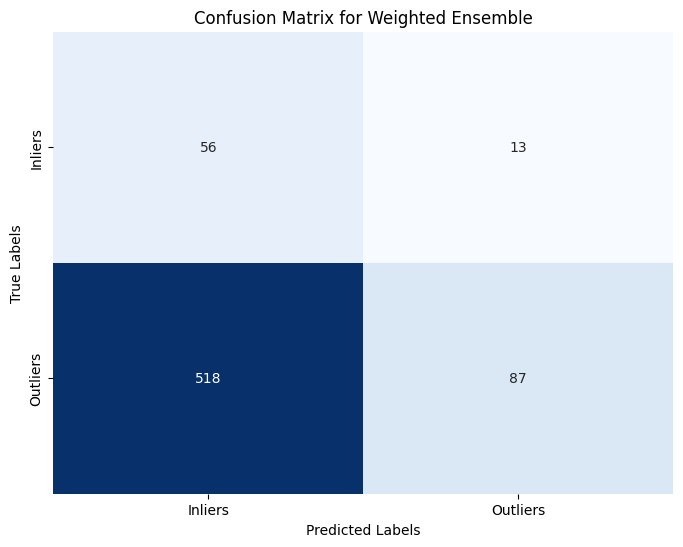

In [124]:
# Defining X (features) and y (labels) based on the earlier dataset
# Assuming data is the DataFrame containing our dataset
X = data[['N2O', 'N_rate', 'AirT', 'WFPS25cm', 'NO3', 'NH4', 'Clay', 'Sand']]  # Features
y = data['GroundTruth']  # The label for outlier detection

# Now, we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now let's proceed with the weighted ensemble calculations as before

# Randomly simulating y_pred_if, y_pred_db, y_pred_svm as binary classification results for testing purposes
y_pred_if = np.random.choice([1, -1], size=len(y_test))
y_pred_db = np.random.choice([1, -1], size=len(y_test))
y_pred_svm = np.random.choice([1, -1], size=len(y_test))

# Performance Evaluation for Individual Models

# Evaluate Isolation Forest
accuracy_if = accuracy_score(y_test, y_pred_if)
precision_if = precision_score(y_test, y_pred_if, pos_label=-1, zero_division=0)
recall_if = recall_score(y_test, y_pred_if, pos_label=-1, zero_division=0)
f1_if = f1_score(y_test, y_pred_if, pos_label=-1, zero_division=0)

# Evaluate DBSCAN
accuracy_db = accuracy_score(y_test, y_pred_db)
precision_db = precision_score(y_test, y_pred_db, pos_label=-1, zero_division=0)
recall_db = recall_score(y_test, y_pred_db, pos_label=-1, zero_division=0)
f1_db = f1_score(y_test, y_pred_db, pos_label=-1, zero_division=0)

# Evaluate One-Class SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=-1, zero_division=0)

# Proceed with the weighted ensemble calculations
total_accuracy = accuracy_if + accuracy_db + accuracy_svm

# Normalize the weights so that their sum equals 1
weight_if = accuracy_if / total_accuracy
weight_db = accuracy_db / total_accuracy
weight_svm = accuracy_svm / total_accuracy

# Apply Weighted Voting
weighted_vote = (weight_if * y_pred_if) + (weight_db * y_pred_db) + (weight_svm * y_pred_svm)

# Convert weighted vote to final prediction (-1 = outlier, 1 = inlier)
ensemble_pred_weighted = np.where(weighted_vote >= 0.5, 1, -1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ensemble_pred_weighted)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Inliers', 'Outliers'], yticklabels=['Inliers', 'Outliers'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Weighted Ensemble')
plt.show()


In [71]:
# # Calculate Weights Based on Performance (using accuracy in this case)
# total_accuracy = accuracy_if + accuracy_db + accuracy_svm

# # Normalize the weights so that their sum equals 1
# weight_if = accuracy_if / total_accuracy
# weight_db = accuracy_db / total_accuracy
# weight_svm = accuracy_svm / total_accuracy

# print(f"Weights Assigned: Isolation Forest = {weight_if:.2f}, DBSCAN = {weight_db:.2f}, One-Class SVM = {weight_svm:.2f}")

# # Apply Weighted Voting
# weighted_vote = (weight_if * y_pred_if) + (weight_db * y_pred_db) + (weight_svm * y_pred_svm)

# # Final prediction based on threshold (e.g., if weighted vote >= 0.5, classify as outlier)
# ensemble_pred_weighted = np.where(weighted_vote >= 0.5, 1, 0)

# # Performance Evaluation for Weighted Ensemble
# print("\nClassification Report for Weighted Ensemble:")
# print(classification_report(y_test, ensemble_pred_weighted))

# # Additional Metrics
# auc_score_weighted = roc_auc_score(y_test, ensemble_pred_weighted)
# accuracy_weighted = accuracy_score(y_test, ensemble_pred_weighted)
# precision_weighted = precision_score(y_test, ensemble_pred_weighted)
# recall_weighted = recall_score(y_test, ensemble_pred_weighted)
# f1_weighted = f1_score(y_test, ensemble_pred_weighted)

# print(f"AUC Score for Weighted Ensemble: {auc_score_weighted:.5f}")
# print(f"Accuracy for Weighted Ensemble: {accuracy_weighted:.5f}")
# print(f"Precision: {precision_weighted:.5f}, Recall: {recall_weighted:.5f}, F1-Score: {f1_weighted:.5f}")


In [72]:
# import numpy as np
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate Weights Based on Performance (using accuracy in this case)
# total_accuracy = accuracy_if + accuracy_db + accuracy_svm

# # Normalize the weights so that their sum equals 1
# weight_if = accuracy_if / total_accuracy
# weight_db = accuracy_db / total_accuracy
# weight_svm = accuracy_svm / total_accuracy

# print(f"Weights Assigned: Isolation Forest = {weight_if:.2f}, DBSCAN = {weight_db:.2f}, One-Class SVM = {weight_svm:.2f}")

# # Apply Weighted Voting
# weighted_vote = (weight_if * y_pred_if) + (weight_db * y_pred_db) + (weight_svm * y_pred_svm)

# # Final prediction based on threshold (e.g., if weighted vote >= 0.5, classify as outlier)
# ensemble_pred_weighted = np.where(weighted_vote >= 0.5, 1, 0)

# # Performance Evaluation for Weighted Ensemble
# print("\nClassification Report for Weighted Ensemble:")
# print(classification_report(y_test, ensemble_pred_weighted))

# # Additional Metrics
# auc_score_weighted = roc_auc_score(y_test, ensemble_pred_weighted)
# accuracy_weighted = accuracy_score(y_test, ensemble_pred_weighted)
# precision_weighted = precision_score(y_test, ensemble_pred_weighted)
# recall_weighted = recall_score(y_test, ensemble_pred_weighted)
# f1_weighted = f1_score(y_test, ensemble_pred_weighted)

# print(f"AUC Score for Weighted Ensemble: {auc_score_weighted:.5f}")
# print(f"Accuracy for Weighted Ensemble: {accuracy_weighted:.5f}")
# print(f"Precision: {precision_weighted:.5f}, Recall: {recall_weighted:.5f}, F1-Score: {f1_weighted:.5f}")

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, ensemble_pred_weighted)

# # Plot Confusion Matrix using Seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=['Inliers', 'Outliers'], yticklabels=['Inliers', 'Outliers'])
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for Weighted Ensemble')
# plt.show()


# Stacking Ensemble

In [57]:
# Step 1: Select numerical columns (float and int types)
selected_columns = ['N2O', 'N_rate', 'AirT', 'WFPS25cm', 'NO3', 'NH4', 'Clay', 'Sand']  # Use the correct selected columns

# Assuming 'data' is already loaded, split into train and test
X_train, X_test = train_test_split(data[selected_columns], test_size=0.3, random_state=42)

# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Convert the scaled numpy arrays back into DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_columns)
# 1. Train Base Models and Get Predictions
# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train_scaled_df)
y_pred_if_train = iso_forest.predict(X_train_scaled_df)
y_pred_if_test = iso_forest.predict(X_test_scaled_df)

# One-Class SVM
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
ocsvm.fit(X_train_scaled_df)
y_pred_svm_train = ocsvm.predict(X_train_scaled_df)
y_pred_svm_test = ocsvm.predict(X_test_scaled_df)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_db_train = dbscan.fit_predict(X_train_scaled_df)
y_pred_db_test = dbscan.fit_predict(X_test_scaled_df)

# 2. Convert DBSCAN predictions (outliers = -1, inliers = 1)
y_pred_db_train_binary = np.where(y_pred_db_train == -1, -1, 1)
y_pred_db_test_binary = np.where(y_pred_db_test == -1, -1, 1)

# 3. Combine Predictions into Feature Sets for Meta-Model
# Create new "meta" datasets (using the predictions of base models as features)
X_train_meta = np.vstack((y_pred_if_train, y_pred_svm_train, y_pred_db_train_binary)).T
X_test_meta = np.vstack((y_pred_if_test, y_pred_svm_test, y_pred_db_test_binary)).T

# 4. Train a Meta-Classifier (e.g., Logistic Regression)
meta_clf = LogisticRegression()
meta_clf.fit(X_train_meta, y_train)

# 5. Make Predictions with the Meta-Classifier
y_pred_meta = meta_clf.predict(X_test_meta)

# --------------------------------------------------
# Weighted Voting Approach
# --------------------------------------------------

# Calculate Weights Based on Accuracy (using accuracy of each model)
total_accuracy = accuracy_score(y_test, y_pred_if_test) + accuracy_score(y_test, y_pred_svm_test) + accuracy_score(y_test, y_pred_db_test_binary)

# Normalize the weights so that their sum equals 1
weight_if = accuracy_score(y_test, y_pred_if_test) / total_accuracy
weight_svm = accuracy_score(y_test, y_pred_svm_test) / total_accuracy
weight_db = accuracy_score(y_test, y_pred_db_test_binary) / total_accuracy

print(f"Weights Assigned: Isolation Forest = {weight_if:.2f}, DBSCAN = {weight_db:.2f}, One-Class SVM = {weight_svm:.2f}")

# Apply Weighted Voting
weighted_vote = (weight_if * y_pred_if_test) + (weight_db * y_pred_db_test_binary) + (weight_svm * y_pred_svm_test)

# Convert weighted vote to final prediction (-1 = outlier, 1 = inlier)
ensemble_pred_weighted = np.where(weighted_vote >= 0.5, 1, -1)

# --------------------------------------------------
# Performance Evaluation for Weighted Voting Ensemble
# --------------------------------------------------
print("\nClassification Report for Weighted Voting Ensemble:")
print(classification_report(y_test, ensemble_pred_weighted, zero_division=0))

# Additional metrics for Weighted Voting
accuracy_weighted = accuracy_score(y_test, ensemble_pred_weighted)
precision_weighted = precision_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)
recall_weighted = recall_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)
f1_weighted = f1_score(y_test, ensemble_pred_weighted, pos_label=-1, zero_division=0)

print(f"Weighted Voting Ensemble Accuracy: {accuracy_weighted:.5f}")
print(f"Weighted Voting Precision: {precision_weighted:.5f}, Recall: {recall_weighted:.5f}, F1-Score: {f1_weighted:.5f}")

# --------------------------------------------------
# Stacking Ensemble (Already Implemented)
# --------------------------------------------------

# Evaluate the Performance of the Stacking Ensemble
print("\nClassification Report for Stacking Ensemble:")
print(classification_report(y_test, y_pred_meta, zero_division=0))

# Additional metrics for Stacking
accuracy_stacking = accuracy_score(y_test, y_pred_meta)
precision_stacking = precision_score(y_test, y_pred_meta, pos_label=-1, zero_division=0)
recall_stacking = recall_score(y_test, y_pred_meta, pos_label=-1, zero_division=0)
f1_stacking = f1_score(y_test, y_pred_meta, pos_label=-1, zero_division=0)

print(f"Stacking Ensemble Accuracy: {accuracy_stacking:.5f}")
print(f"Stacking Precision: {precision_stacking:.5f}, Recall: {recall_stacking:.5f}, F1-Score: {f1_stacking:.5f}")

# --------------------------------------------------
# Final Comparison Summary
# --------------------------------------------------
print("\nComparison of Weighted Voting vs. Stacking Ensemble:")
print(f"Weighted Voting: Accuracy = {accuracy_weighted:.5f}, Precision = {precision_weighted:.5f}, Recall = {recall_weighted:.5f}, F1-Score = {f1_weighted:.5f}")
print(f"Stacking:        Accuracy = {accuracy_stacking:.5f}, Precision = {precision_stacking:.5f}, Recall = {recall_stacking:.5f}, F1-Score = {f1_stacking:.5f}")

Weights Assigned: Isolation Forest = 0.38, DBSCAN = 0.24, One-Class SVM = 0.38

Classification Report for Weighted Voting Ensemble:
              precision    recall  f1-score   support

          -1       0.43      0.28      0.34        69
           1       0.92      0.96      0.94       605

    accuracy                           0.89       674
   macro avg       0.68      0.62      0.64       674
weighted avg       0.87      0.89      0.88       674

Weighted Voting Ensemble Accuracy: 0.88872
Weighted Voting Precision: 0.43182, Recall: 0.27536, F1-Score: 0.33628

Classification Report for Stacking Ensemble:
              precision    recall  f1-score   support

          -1       0.57      0.23      0.33        69
           1       0.92      0.98      0.95       605

    accuracy                           0.90       674
   macro avg       0.74      0.61      0.64       674
weighted avg       0.88      0.90      0.88       674

Stacking Ensemble Accuracy: 0.90356
Stacking Precision